# Reinforcement Learning

## Value iteration

In [1]:
from mllab.rl import TicTacToe, LGame
import numpy as np

We implement value iteration and test it on two board games, Tic-tac-toe and the L-Game ([Wikipedia](https://en.wikipedia.org/wiki/L_game)).

Both games have the same interface, so you can write your code to work for both games without further changes. The interface is shown in the following.

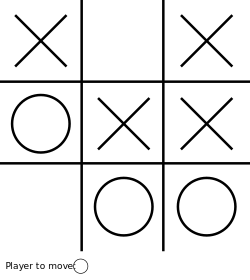

In [2]:
game = TicTacToe
state = game.unique_states[0]  # A list of all possible game states. The states are normalized.
state

In [3]:
state = game.unique_states[0]
print("Current player:", state.player)
print("Winner?", state.winner())  # returns either None or a player number
print("Is terminal? ", state.is_terminal())  # is the game finished?
print("List of valid actions: ", state.valid_actions())

Current player: 2
Winner? None
Is terminal?  False
List of valid actions:  [(0, 1), (2, 0)]


Let's see how we can apply an action and get a new state.

Place piece at (2, 0)


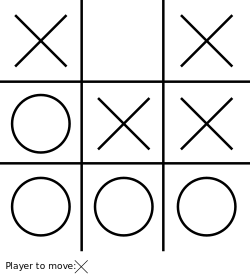

In [4]:
import random

#print(state.valid_actions())
action = random.choice(state.valid_actions())
print("Place piece at", action)
new_state = state.apply_action(action)
new_state
#print(new_state.player)
#print(new_state.is_terminal())

### Normalized States

The returned `new_state` is **not normalized**. Since the value function is only defined for normalized states. You have to normalize the state.

In [5]:
new_state_normalized = new_state.normalized()

### Task 1

Implement the `win_reward` and `value_iteration` function below. Use the game interface explained above.

**Pitfall**: Let $s$ be the current state, $a$ be a valid action for $s$, and $s^\prime$ be the state we get if action $a$ is taken in state $s$. Then, the reward for the player taking action $a$ in $s$ is _not_ $V(s^\prime)$, but $-V(s^\prime)$. We use one value function for both policies and only store the value for normalized states (for equivalence classes).

In [6]:
from itertools import count


def win_reward(s, action=None):
    """
    Compute the reward if in state s the given action is applied.
    
    If there is no winner, 0 is returned. Otherwise, 1 or -1 is returned,
    depending on whether the current player has won or lost.
    """
    # your code goes here
    test_state = s.apply_action(action)### now in new state with new players turn
    winner = test_state.winner()
    if winner==None:
        return 0
    elif winner==test_state.player:
        return 1
    else:
        return -1
    


def value_iteration(game, asynchronous=True, reward=win_reward):
    """
    Perform value iteration and return the value function.
    
    Parameters
    ==========
    
    game: A game class (e.g. TicTacToe or LGame)
    asynchronous: bool
        Whether to do the updates directly on the current iterate
        or if the iterate is only updated at the end of the max operation (updated in parallel, synchronous).
        In other words, if the parameter is False the maximum is computed
        independently (using old values, ignoring other updates). Otherwise, other max operations
        in the same iteration are taken into account.
    reward: function
        A function which takes a state and an action and returns a number.
    """
    states = game.unique_states
    v = {s: 0 for s in states}  # value function, initialized to 0
    # your code goes here
    gamma = 1      
    v_new = v.copy()
    
    while True:
        v=v_new.copy()

        for s in states:
            if not s.is_terminal():
                a = random.choice(s.valid_actions())
                v_new[s] = -1*gamma*v[s.apply_action(a).normalized()] - reward(s,a)
                for a in s.valid_actions():
                    if asynchronous:                    
                        if -1*gamma*v_new[s.apply_action(a).normalized()] - reward(s,a)> v_new[s]:
                            v_new[s]=-1*gamma*v_new[s.apply_action(a).normalized()] - reward(s,a)
                            
                    else:    
                        if -1*gamma*v[s.apply_action(a).normalized()]-reward(s,a) > v_new[s]:
                            v_new[s]=-1*gamma*v[s.apply_action(a).normalized()]-reward(s,a)
        if v == v_new:
            break
    print(v_new)
    return v_new


    #can improve this by somehow choosing states that are almost terminal first I think

Compute an optimal value function for the game Tic-Tac-Toe.

In [7]:
vT_slow = value_iteration(TicTacToe, asynchronous=False)
vT_fast = value_iteration(TicTacToe, asynchronous=True)

{TicTacToe(x|☐|x, o|x|x, ☐|o|o): 1, TicTacToe(☐|x|o, o|x|x, x|o|o): 0, TicTacToe(x|x|☐, x|x|o, o|o|o): 0, TicTacToe(☐|o|☐, ☐|☐|x, x|o|x): 1, TicTacToe(☐|☐|☐, o|☐|x, x|x|o): 0, TicTacToe(☐|x|☐, ☐|o|☐, ☐|o|x): 1, TicTacToe(o|x|x, ☐|x|x, ☐|o|o): 1, TicTacToe(☐|o|☐, o|☐|x, ☐|x|x): -1, TicTacToe(o|x|☐, ☐|x|x, o|x|o): 0, TicTacToe(x|o|☐, o|o|x, x|x|o): 0, TicTacToe(☐|x|☐, o|☐|☐, ☐|o|x): 1, TicTacToe(x|o|x, o|x|o, x|o|x): 0, TicTacToe(☐|☐|☐, ☐|x|☐, o|x|o): 1, TicTacToe(x|☐|o, o|x|☐, x|x|o): 1, TicTacToe(☐|x|☐, o|x|x, ☐|o|o): 0, TicTacToe(☐|☐|x, x|☐|o, x|o|o): 1, TicTacToe(x|x|x, o|o|x, x|o|o): 0, TicTacToe(☐|☐|☐, x|x|☐, ☐|☐|o): 0, TicTacToe(☐|x|☐, ☐|o|x, ☐|o|x): 0, TicTacToe(o|☐|x, x|x|x, ☐|o|o): 0, TicTacToe(x|x|☐, ☐|o|o, x|o|x): 1, TicTacToe(x|☐|x, ☐|☐|☐, o|☐|o): 1, TicTacToe(x|☐|☐, ☐|☐|☐, ☐|x|o): 0, TicTacToe(☐|x|x, x|o|☐, ☐|o|o): 1, TicTacToe(☐|x|☐, x|☐|☐, ☐|o|o): 1, TicTacToe(x|o|x, ☐|o|x, o|x|o): 0, TicTacToe(x|o|x, ☐|☐|x, x|o|o): 1, TicTacToe(x|☐|x, x|o|☐, ☐|o|o): 1, TicTacToe(☐|☐|☐, o

{TicTacToe(x|☐|x, o|x|x, ☐|o|o): 1, TicTacToe(☐|x|o, o|x|x, x|o|o): 0, TicTacToe(x|x|☐, x|x|o, o|o|o): 0, TicTacToe(☐|o|☐, ☐|☐|x, x|o|x): 1, TicTacToe(☐|☐|☐, o|☐|x, x|x|o): 0, TicTacToe(☐|x|☐, ☐|o|☐, ☐|o|x): 1, TicTacToe(o|x|x, ☐|x|x, ☐|o|o): 1, TicTacToe(☐|o|☐, o|☐|x, ☐|x|x): -1, TicTacToe(o|x|☐, ☐|x|x, o|x|o): 0, TicTacToe(x|o|☐, o|o|x, x|x|o): 0, TicTacToe(☐|x|☐, o|☐|☐, ☐|o|x): 1, TicTacToe(x|o|x, o|x|o, x|o|x): 0, TicTacToe(☐|☐|☐, ☐|x|☐, o|x|o): 1, TicTacToe(x|☐|o, o|x|☐, x|x|o): 1, TicTacToe(☐|x|☐, o|x|x, ☐|o|o): 0, TicTacToe(☐|☐|x, x|☐|o, x|o|o): 1, TicTacToe(x|x|x, o|o|x, x|o|o): 0, TicTacToe(☐|☐|☐, x|x|☐, ☐|☐|o): 0, TicTacToe(☐|x|☐, ☐|o|x, ☐|o|x): 0, TicTacToe(o|☐|x, x|x|x, ☐|o|o): 0, TicTacToe(x|x|☐, ☐|o|o, x|o|x): 1, TicTacToe(x|☐|x, ☐|☐|☐, o|☐|o): 1, TicTacToe(x|☐|☐, ☐|☐|☐, ☐|x|o): 0, TicTacToe(☐|x|x, x|o|☐, ☐|o|o): 1, TicTacToe(☐|x|☐, x|☐|☐, ☐|o|o): 1, TicTacToe(x|o|x, ☐|o|x, o|x|o): 0, TicTacToe(x|o|x, ☐|☐|x, x|o|o): 1, TicTacToe(x|☐|x, x|o|☐, ☐|o|o): 1, TicTacToe(☐|☐|☐, o

Now compute an optimal value function for the L-Game.

In [8]:
vL_slow = value_iteration(LGame, asynchronous=False)
vL_fast = value_iteration(LGame, asynchronous=True)

{LGame(L1: ▜ (1, 2), L2: ▛▀ (2, 0), N1: (0, 0), N2: (3, 2)): 1, LGame(L1: ▜ (0, 2), L2: ▀▜ (2, 0), N1: (1, 1), N2: (3, 1)): 0, LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (2, 1), N2: (3, 2)): 0, LGame(L1: ▜ (0, 0), L2: ▟ (1, 1), N1: (0, 2), N2: (0, 3)): 0, LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (0, 1), N2: (1, 2)): 0, LGame(L1: ▜ (0, 2), L2: ▜ (0, 0), N1: (2, 0), N2: (3, 2)): 1, LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (0, 0), N2: (2, 0)): 0, LGame(L1: ▜ (1, 2), L2: ▟ (1, 0), N1: (0, 2), N2: (2, 2)): 0, LGame(L1: ▜ (0, 2), L2: ▀▜ (2, 0), N1: (1, 0), N2: (3, 0)): 0, LGame(L1: ▜ (0, 1), L2: ▜ (1, 0), N1: (1, 3), N2: (2, 3)): 0, LGame(L1: ▜ (0, 2), L2: ▄▟ (2, 0), N1: (1, 1), N2: (2, 1)): 0, LGame(L1: ▜ (1, 2), L2: ▙ (0, 0), N1: (2, 2), N2: (3, 0)): 1, LGame(L1: ▜ (0, 0), L2: ▟ (0, 2), N1: (1, 2), N2: (3, 1)): 0, LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (2, 1), N2: (3, 1)): 0, LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 0), N1: (1, 1), N2: (3, 3)): 1, LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 1), N1: (2, 0), N2: (2, 2)): 0,

{LGame(L1: ▜ (1, 2), L2: ▛▀ (2, 0), N1: (0, 0), N2: (3, 2)): 1, LGame(L1: ▜ (0, 2), L2: ▀▜ (2, 0), N1: (1, 1), N2: (3, 1)): 0, LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (2, 1), N2: (3, 2)): 0, LGame(L1: ▜ (0, 0), L2: ▟ (1, 1), N1: (0, 2), N2: (0, 3)): 0, LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (0, 1), N2: (1, 2)): 0, LGame(L1: ▜ (0, 2), L2: ▜ (0, 0), N1: (2, 0), N2: (3, 2)): 1, LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (0, 0), N2: (2, 0)): 0, LGame(L1: ▜ (1, 2), L2: ▟ (1, 0), N1: (0, 2), N2: (2, 2)): 0, LGame(L1: ▜ (0, 2), L2: ▀▜ (2, 0), N1: (1, 0), N2: (3, 0)): 0, LGame(L1: ▜ (0, 1), L2: ▜ (1, 0), N1: (1, 3), N2: (2, 3)): 0, LGame(L1: ▜ (0, 2), L2: ▄▟ (2, 0), N1: (1, 1), N2: (2, 1)): 0, LGame(L1: ▜ (1, 2), L2: ▙ (0, 0), N1: (2, 2), N2: (3, 0)): 1, LGame(L1: ▜ (0, 0), L2: ▟ (0, 2), N1: (1, 2), N2: (3, 1)): 0, LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (2, 1), N2: (3, 1)): 0, LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 0), N1: (1, 1), N2: (3, 3)): 1, LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 1), N1: (2, 0), N2: (2, 2)): 0,

Write code to get an policy from a value function.

In [13]:
import random


class ValueFunctionBasedPolicy:
    """
    A policy computed using a value function.
    
    Usage
    =====
    
        # assume a value function is stored in v
        policy = ValueFunctionBasedPolicy(v)

        # get a best action for state
        action = policy[state]
    """

    def __init__(self, v, reward):
        self._v = v
        self._reward = reward
    
    def __getitem__(self, s):
        """Get an action for state s."""
        return random.choice(self.actions(s))
    
    def actions(self, s):
        """Get all actions which maximize the reward in state s."""
        actions = list(s.valid_actions())
        if not actions:
            return []
        # your code goes here
        poss_states = {a: s.apply_action(a).normalized() for a in actions}
        print("poss states", poss_states)
        
        maximum = max(self._v[s] for s in poss_states.values())
        print("max =", maximum)
                
        for a in actions:
            #print(self._v[s.apply_action(a).normalized()])
            print("action", a)
            print("new state ",s.apply_action(a))
            print("reward", self._v[s.apply_action(a).normalized()])
            print("")
            if self._v[s.apply_action(a).normalized()] != maximum:
                print("removed action ",a)
                actions.remove(a)      
        return actions

    def value(self, s, a):
        return self._reward(s, a) - self._v[s.apply_action(a).normalized()]

Let us watch the agent play against itself.

In [14]:
from mllab.rl import self_play

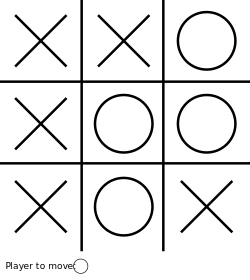

poss states {(0, 0): TicTacToe(☐|☐|☐, ☐|☐|☐, ☐|☐|x), (0, 1): TicTacToe(☐|☐|☐, ☐|☐|☐, ☐|x|☐), (0, 2): TicTacToe(☐|☐|☐, ☐|☐|☐, ☐|☐|x), (1, 0): TicTacToe(☐|☐|☐, ☐|☐|☐, ☐|x|☐), (1, 1): TicTacToe(☐|☐|☐, ☐|x|☐, ☐|☐|☐), (1, 2): TicTacToe(☐|☐|☐, ☐|☐|☐, ☐|x|☐), (2, 0): TicTacToe(☐|☐|☐, ☐|☐|☐, ☐|☐|x), (2, 1): TicTacToe(☐|☐|☐, ☐|☐|☐, ☐|x|☐), (2, 2): TicTacToe(☐|☐|☐, ☐|☐|☐, ☐|☐|x)}
max = 0
action (0, 0)
new state  ┌───┬───┬───┐
│▚▂▞│   │   │
│▞▔▚│   │   │
├───┼───┼───┤
│   │   │   │
│   │   │   │
├───┼───┼───┤
│   │   │   │
│   │   │   │
└───┴───┴───┘
reward 0

action (0, 1)
new state  ┌───┬───┬───┐
│   │▚▂▞│   │
│   │▞▔▚│   │
├───┼───┼───┤
│   │   │   │
│   │   │   │
├───┼───┼───┤
│   │   │   │
│   │   │   │
└───┴───┴───┘
reward 0

action (0, 2)
new state  ┌───┬───┬───┐
│   │   │▚▂▞│
│   │   │▞▔▚│
├───┼───┼───┤
│   │   │   │
│   │   │   │
├───┼───┼───┤
│   │   │   │
│   │   │   │
└───┴───┴───┘
reward 0

action (1, 0)
new state  ┌───┬───┬───┐
│   │   │   │
│   │   │   │
├───┼───┼───┤
│▚▂▞│   │   │

Game finished.


(TicTacToe(x|x|o, x|o|o, x|o|x), 9)

In [15]:
self_play(TicTacToe, ValueFunctionBasedPolicy(vT_fast, win_reward), sleep=2)

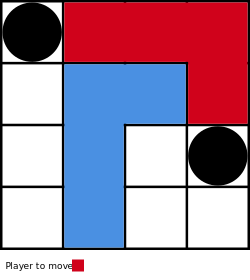

poss states {(2, 4, 0, 15): LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (0, 0), N2: (3, 3)), (2, 4, 0, 1): LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (3, 2), N2: (3, 3)), (2, 4, 1, 15): LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (0, 0), N2: (3, 2)), (2, 4, 0, 4): LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (2, 3), N2: (3, 3)), (2, 4, 4, 15): LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (0, 0), N2: (2, 3)), (2, 4, 0, 7): LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (2, 0), N2: (3, 3)), (2, 4, 7, 15): LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (0, 0), N2: (2, 0)), (2, 4, 0, 8): LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (1, 3), N2: (3, 3)), (2, 4, 8, 15): LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (0, 0), N2: (1, 3)), (2, 4, 0, 11): LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (1, 0), N2: (3, 3)), (2, 4, 11, 15): LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (0, 0), N2: (1, 0)), (2, 4, 0, 12): LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (0, 3), N2: (3, 3)), (2, 4, 12, 15): LGame(L1: ▜ (0, 1), L2: ▟ (1, 0), N1: (0, 0), N2: (0, 3)), (2, 2, 0, 15): LGame(L1: ▜ 

poss states {(0, 2, 12, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 0), N2: (3, 0)), (0, 2, 12, 5): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (2, 2), N2: (3, 0)), (0, 2, 5, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 0), N2: (2, 2)), (0, 2, 12, 6): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 2), N2: (3, 0)), (0, 2, 6, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 0), N2: (1, 2)), (0, 2, 12, 10): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 1), N2: (3, 0)), (0, 2, 10, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 0), N2: (1, 1)), (0, 2, 12, 11): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 1), N2: (3, 0)), (0, 2, 11, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 0), N2: (0, 1)), (0, 2, 12, 13): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (2, 0), N2: (3, 0)), (0, 2, 13, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 0), N2: (2, 0)), (0, 2, 12, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 0), N2: (3, 0)), (0, 2, 14, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 0), N2: (1, 0)), (5,

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 4, 0, 15)
action (5, 4, 4, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖╳╳╳╳╳╳▓▓▓┃
┃▝▀▘╳╳╳╳╳╳▓▓▓┃
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
┃   ╳╳╳   ▗▄▖┃
┃   ╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 4, 4, 15)
action (5, 4, 8, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃▗▄▖╳╳╳      ┃
┃▝▀▘╳╳╳      ┃
┃   ╳╳╳   ▗▄▖┃
┃   ╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 4, 8, 15)
action (5, 4, 10, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃   ╳╳╳▗▄▖   ┃
┃   ╳╳╳▝▀▘   ┃
┃   ╳╳╳   ▗▄▖┃
┃   ╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 4, 10, 15)
action (5, 4, 11, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃   ╳╳╳   ▗▄▖┃
┃   ╳╳╳   ▝▀▘┃
┃   ╳╳╳   ▗▄▖┃
┃   ╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 4, 11, 15)
action (5, 4, 14, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓

reward 0

removed action  (9, 1, 12, 0)
action (9, 1, 12, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃▗▄▖╳╳╳      ┃
┃▝▀▘╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 1, 12, 4)
action (9, 1, 12, 5)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃▗▄▖╳╳╳      ┃
┃▝▀▘╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 1, 12, 5)
action (9, 1, 12, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃      ▗▄▖▓▓▓┃
┃      ▝▀▘▓▓▓┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃▗▄▖╳╳╳      ┃
┃▝▀▘╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 1, 12, 6)
action (9, 1, 12, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃▗▄▖╳╳╳╳╳╳╳╳╳┃
┃▝▀▘╳╳╳╳╳╳╳╳╳┃
┃▗▄▖╳╳╳      ┃
┃▝▀▘╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 1, 12, 8)
action (9, 1, 12, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓

poss states {(4, 2, 5, 14): LGame(L1: ▜ (1, 2), L2: ▙▄ (2, 0), N1: (1, 0), N2: (2, 2)), (4, 2, 5, 3): LGame(L1: ▜ (1, 2), L2: ▙▄ (2, 0), N1: (0, 3), N2: (2, 2)), (4, 2, 3, 14): LGame(L1: ▜ (1, 2), L2: ▙▄ (2, 0), N1: (0, 3), N2: (1, 0)), (4, 2, 5, 7): LGame(L1: ▜ (1, 2), L2: ▙▄ (2, 0), N1: (0, 2), N2: (2, 2)), (4, 2, 7, 14): LGame(L1: ▜ (1, 2), L2: ▙▄ (2, 0), N1: (0, 2), N2: (1, 0)), (4, 2, 5, 9): LGame(L1: ▜ (1, 2), L2: ▙▄ (2, 0), N1: (2, 1), N2: (2, 2)), (4, 2, 9, 14): LGame(L1: ▜ (1, 2), L2: ▙▄ (2, 0), N1: (1, 0), N2: (2, 1)), (4, 2, 5, 10): LGame(L1: ▜ (1, 2), L2: ▙▄ (2, 0), N1: (1, 1), N2: (2, 2)), (4, 2, 10, 14): LGame(L1: ▜ (1, 2), L2: ▙▄ (2, 0), N1: (1, 0), N2: (1, 1)), (4, 2, 5, 11): LGame(L1: ▜ (1, 2), L2: ▙▄ (2, 0), N1: (0, 1), N2: (2, 2)), (4, 2, 11, 14): LGame(L1: ▜ (1, 2), L2: ▙▄ (2, 0), N1: (0, 1), N2: (1, 0)), (4, 2, 5, 15): LGame(L1: ▜ (1, 2), L2: ▙▄ (2, 0), N1: (0, 0), N2: (2, 2)), (4, 2, 15, 14): LGame(L1: ▜ (1, 2), L2: ▙▄ (2, 0), N1: (0, 0), N2: (1, 0)), (2, 6, 5, 14

removed action  (2, 6, 5, 15)
action (8, 1, 5, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃   ▗▄▖▓▓▓   ┃
┃   ▝▀▘▓▓▓   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳   ▗▄▖   ┃
┃╳╳╳   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 1, 5, 14)
action (8, 1, 3, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃      ▓▓▓   ┃
┃      ▓▓▓   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳   ▗▄▖   ┃
┃╳╳╳   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (8, 1, 5, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▗▄▖▗▄▖▓▓▓   ┃
┃▝▀▘▝▀▘▓▓▓   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 1, 5, 4)
action (8, 1, 5, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃   ▗▄▖▓▓▓▗▄▖┃
┃   ▝▀▘▓▓▓▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 1, 5, 7)
action (8, 1, 5, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃   ▗▄▖▓▓▓   ┃
┃   ▝▀▘▓▓▓   ┃
┃╳╳╳╳╳╳╳╳

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 0, 5, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃╳╳╳▗▄▖▓▓▓▓▓▓┃
┃╳╳╳▝▀▘▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 0, 3, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 0, 3, 13)
action (6, 0, 12, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃            ┃
┃            ┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃▗▄▖▗▄▖   ▓▓▓┃
┃▝▀▘▝▀▘   ▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 0, 5, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃            ┃
┃            ┃
┃╳╳╳▗▄▖▓▓▓▓▓▓┃
┃╳╳╳▝▀▘▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃      ▗▄▖▓▓▓┃
┃      ▝▀▘▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 0, 5, 14)
action (6, 6, 5, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃            ┃
┃            ┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃   ▗▄▖▓▓▓

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳▗▄▖▓▓▓▓▓▓┃
┃╳╳╳▝▀▘▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 2, 5, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳▗▄▖▓▓▓▓▓▓┃
┃╳╳╳▝▀▘▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 2, 5, 13)
action (0, 2, 10, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▗▄▖▓▓▓┃
┃╳╳╳╳╳╳▝▀▘▓▓▓┃
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 2, 12, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃▗▄▖   ▗▄▖▓▓▓┃
┃▝▀▘   ▝▀▘▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 2, 12, 14)
action (1, 4, 12, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳╳╳╳   ┃
┃   ╳╳╳╳╳╳   ┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳   ▓▓▓┃
┃   ╳╳╳   ▓▓▓┃
┃▗▄▖▗▄▖   ▓▓▓┃
┃▝▀▘▝▀▘   ▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 

poss states {(2, 4, 8, 13): LGame(L1: ▜ (0, 0), L2: ▛ (0, 2), N1: (2, 0), N2: (3, 1)), (2, 4, 8, 4): LGame(L1: ▜ (0, 0), L2: ▛ (0, 2), N1: (1, 0), N2: (2, 0)), (2, 4, 4, 13): LGame(L1: ▜ (0, 0), L2: ▛ (0, 2), N1: (1, 0), N2: (3, 1)), (2, 4, 8, 7): LGame(L1: ▜ (0, 0), L2: ▛ (0, 2), N1: (1, 3), N2: (2, 0)), (2, 4, 7, 13): LGame(L1: ▜ (0, 0), L2: ▛ (0, 2), N1: (1, 3), N2: (3, 1)), (2, 4, 8, 11): LGame(L1: ▜ (0, 0), L2: ▛ (0, 2), N1: (2, 0), N2: (2, 3)), (2, 4, 11, 13): LGame(L1: ▜ (0, 0), L2: ▛ (0, 2), N1: (2, 3), N2: (3, 1)), (2, 4, 8, 12): LGame(L1: ▜ (0, 0), L2: ▛ (0, 2), N1: (2, 0), N2: (3, 0)), (2, 4, 12, 13): LGame(L1: ▜ (0, 0), L2: ▛ (0, 2), N1: (3, 0), N2: (3, 1)), (2, 4, 8, 14): LGame(L1: ▜ (0, 0), L2: ▛ (0, 2), N1: (2, 0), N2: (3, 2)), (2, 4, 14, 13): LGame(L1: ▜ (0, 0), L2: ▛ (0, 2), N1: (3, 1), N2: (3, 2)), (2, 4, 8, 15): LGame(L1: ▜ (0, 0), L2: ▛ (0, 2), N1: (2, 0), N2: (3, 3)), (2, 4, 15, 13): LGame(L1: ▜ (0, 0), L2: ▛ (0, 2), N1: (3, 1), N2: (3, 3)), (2, 2, 8, 13): LGame(L1

action (2, 2, 14, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ▗▄▖▗▄▖   ┃
┃   ▝▀▘▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (2, 2, 14, 13)
action (2, 2, 15, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ▗▄▖   ▗▄▖┃
┃   ▝▀▘   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (2, 2, 15, 13)
action (6, 4, 8, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▗▄▖   ┃
┃╳╳╳╳╳╳▝▀▘   ┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃▗▄▖╳╳╳▓▓▓   ┃
┃▝▀▘╳╳╳▓▓▓   ┃
┃      ▓▓▓   ┃
┃      ▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 4, 8, 2)
action (6, 4, 8, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃▗▄▖╳╳╳▓▓▓   ┃
┃▝▀▘╳╳╳▓▓▓   ┃
┃      ▓▓▓   ┃
┃      ▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 4, 8, 3)
action (6, 4, 8, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
┃▗▄▖╳╳╳▓▓▓▓▓▓┃
┃▝▀▘╳╳╳▓▓▓▓▓▓┃
┃▗▄▖╳╳

poss states {(1, 4, 8, 13): LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (0, 1), N2: (1, 0)), (1, 4, 8, 0): LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (1, 0), N2: (3, 0)), (1, 4, 0, 13): LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (0, 1), N2: (3, 0)), (1, 4, 8, 3): LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (1, 0), N2: (3, 3)), (1, 4, 3, 13): LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (0, 1), N2: (3, 3)), (1, 4, 8, 4): LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (1, 0), N2: (2, 0)), (1, 4, 4, 13): LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (0, 1), N2: (2, 0)), (1, 4, 8, 6): LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (1, 0), N2: (2, 2)), (1, 4, 6, 13): LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (0, 1), N2: (2, 2)), (1, 4, 8, 10): LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (1, 0), N2: (1, 2)), (1, 4, 10, 13): LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (0, 1), N2: (1, 2)), (1, 4, 8, 12): LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (0, 0), N2: (1, 0)), (1, 4, 12, 13): LGame(L1: ▜ (0, 2), L2: ▙ (1, 1), N1: (0, 0), N2: (0, 1)), (1, 2, 8, 13): LGame(L1: ▜ 

action (0, 1, 8, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 1, 3, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃   ▗▄▖▓▓▓▓▓▓┃
┃   ▝▀▘▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 1, 8, 5)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 1, 5, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃   ▗▄▖▓▓▓▓▓▓┃
┃   ▝▀▘▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 1, 8, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳   ▗▄▖▓▓▓┃
┃╳╳╳   ▝▀▘▓▓▓┃
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 1, 8, 6)
action (0, 1, 

poss states {(6, 4, 9, 13): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (1, 0), N2: (1, 1)), (6, 4, 9, 0): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 3), N2: (1, 1)), (6, 4, 0, 13): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 3), N2: (1, 0)), (6, 4, 9, 4): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 2), N2: (1, 1)), (6, 4, 4, 13): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 2), N2: (1, 0)), (6, 4, 9, 8): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 1), N2: (1, 1)), (6, 4, 8, 13): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 1), N2: (1, 0)), (6, 4, 9, 11): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (1, 1), N2: (3, 1)), (6, 4, 11, 13): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (1, 0), N2: (3, 1)), (6, 4, 9, 12): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 0), N2: (1, 1)), (6, 4, 12, 13): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 0), N2: (1, 0)), (6, 4, 9, 15): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (1, 1), N2: (3, 0)), (6, 4, 15, 13): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (1, 0), N2: (3, 0)), (6, 2, 9, 13

action (4, 2, 0, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 2, 15, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃            ┃
┃            ┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳▗▄▖▓▓▓   ┃
┃╳╳╳▝▀▘▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

poss states {(2, 4, 0, 15): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 3), N2: (3, 0)), (2, 4, 0, 1): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 2), N2: (0, 3)), (2, 4, 1, 15): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 2), N2: (3, 0)), (2, 4, 0, 7): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 3), N2: (1, 0)), (2, 4, 7, 15): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (1, 0), N2: (3, 0)), (2, 4, 0, 9): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 3), N2: (2, 2)), (2, 4, 9, 15): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (2, 2), N2: (3, 0)), (2, 4, 0, 11): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 3), N2: (2, 0)), (2, 4, 11, 15)

reward 1

action (2, 0, 0, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▗▄▖▓▓▓┃
┃╳╳╳╳╳╳▝▀▘▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 6, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▗▄▖▓▓▓┃
┃╳╳╳╳╳╳▝▀▘▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 0, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 9, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 0, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳   ▗▄▖▓▓▓┃
┃╳╳╳   ▝▀▘▓▓▓┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 10, 15)
new state 

poss states {(4, 1, 0, 1): LGame(L1: ▜ (1, 0), L2: ▜ (0, 1), N1: (0, 3), N2: (1, 3)), (4, 1, 0, 2): LGame(L1: ▜ (1, 0), L2: ▜ (0, 1), N1: (0, 3), N2: (2, 3)), (4, 1, 2, 1): LGame(L1: ▜ (1, 0), L2: ▜ (0, 1), N1: (1, 3), N2: (2, 3)), (4, 1, 0, 3): LGame(L1: ▜ (1, 0), L2: ▜ (0, 1), N1: (0, 3), N2: (3, 3)), (4, 1, 3, 1): LGame(L1: ▜ (1, 0), L2: ▜ (0, 1), N1: (1, 3), N2: (3, 3)), (4, 1, 0, 7): LGame(L1: ▜ (1, 0), L2: ▜ (0, 1), N1: (0, 3), N2: (3, 2)), (4, 1, 7, 1): LGame(L1: ▜ (1, 0), L2: ▜ (0, 1), N1: (1, 3), N2: (3, 2)), (4, 1, 0, 12): LGame(L1: ▜ (1, 0), L2: ▜ (0, 1), N1: (0, 0), N2: (0, 3)), (4, 1, 12, 1): LGame(L1: ▜ (1, 0), L2: ▜ (0, 1), N1: (0, 0), N2: (1, 3)), (4, 1, 0, 14): LGame(L1: ▜ (1, 0), L2: ▜ (0, 1), N1: (0, 3), N2: (2, 0)), (4, 1, 14, 1): LGame(L1: ▜ (1, 0), L2: ▜ (0, 1), N1: (1, 3), N2: (2, 0)), (4, 1, 0, 15): LGame(L1: ▜ (1, 0), L2: ▜ (0, 1), N1: (0, 3), N2: (3, 0)), (4, 1, 15, 1): LGame(L1: ▜ (1, 0), L2: ▜ (0, 1), N1: (1, 3), N2: (3, 0)), (0, 3, 0, 1): LGame(L1: ▜ (1, 0)

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳   ▗▄▖▓▓▓┃
┃╳╳╳   ▝▀▘▓▓▓┃
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 0, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃▗▄▖         ┃
┃▝▀▘         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 12, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃▗▄▖   ▗▄▖   ┃
┃▝▀▘   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 0, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 13, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃   ▗▄▖▗▄▖   ┃
┃   ▝▀▘▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 0, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▓▓

poss states {(0, 2, 13, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 0), N2: (2, 0)), (0, 2, 13, 5): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (2, 0), N2: (2, 2)), (0, 2, 5, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 0), N2: (2, 2)), (0, 2, 13, 6): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 2), N2: (2, 0)), (0, 2, 6, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 0), N2: (1, 2)), (0, 2, 13, 10): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 1), N2: (2, 0)), (0, 2, 10, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 0), N2: (1, 1)), (0, 2, 13, 11): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 1), N2: (2, 0)), (0, 2, 11, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 1), N2: (1, 0)), (0, 2, 13, 12): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (2, 0), N2: (3, 0)), (0, 2, 12, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 0), N2: (3, 0)), (0, 2, 13, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 0), N2: (2, 0)), (0, 2, 15, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 0), N2: (1, 0)), (4,

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▗▄▖▓▓▓┃
┃╳╳╳╳╳╳▝▀▘▓▓▓┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳   ▗▄▖   ┃
┃╳╳╳   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 4, 13, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 4, 9, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
┃╳╳╳   ▗▄▖   ┃
┃╳╳╳   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 4, 13, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳   ▗▄▖   ┃
┃╳╳╳   ▝▀▘   ┃
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 4, 13, 10)
action (4, 4, 13, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 4, 11, 14)
new st

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 3, 13, 12)
action (4, 3, 13, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃      ╳╳╳▓▓▓┃
┃      ╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃   ▗▄▖   ▗▄▖┃
┃   ▝▀▘   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 3, 13, 15)
action (9, 7, 13, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ▗▄▖▗▄▖╳╳╳┃
┃   ▝▀▘▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 7, 13, 0)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ▗▄▖   ╳╳╳┃
┃   ▝▀▘   ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 7, 0, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 7, 0, 14)
action (9, 7, 4, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃   ╳╳

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓╳╳╳   ┃
┃   ▓▓▓╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 1, 0, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓╳╳╳   ┃
┃   ▓▓▓╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃         ▗▄▖┃
┃         ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 1, 14, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖▓▓▓╳╳╳   ┃
┃▝▀▘▓▓▓╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 1, 14, 4)
action (1, 1, 14, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓╳╳╳▗▄▖┃
┃   ▓▓▓╳╳╳▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 1, 7, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓╳╳╳▗▄▖┃
┃   ▓▓▓╳╳╳▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃         ▗▄▖┃
┃         ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 1, 14, 11)
new state


removed action  (6, 4, 0, 15)
action (6, 4, 4, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖▓▓▓╳╳╳╳╳╳┃
┃▝▀▘▓▓▓╳╳╳╳╳╳┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
┃      ╳╳╳▗▄▖┃
┃      ╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 4, 4, 15)
action (6, 4, 8, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃▗▄▖   ╳╳╳   ┃
┃▝▀▘   ╳╳╳   ┃
┃      ╳╳╳▗▄▖┃
┃      ╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 4, 8, 15)
action (6, 4, 9, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▗▄▖╳╳╳   ┃
┃   ▝▀▘╳╳╳   ┃
┃      ╳╳╳▗▄▖┃
┃      ╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 4, 9, 15)
action (6, 4, 11, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃      ╳╳╳▗▄▖┃
┃      ╳╳╳▝▀▘┃
┃      ╳╳╳▗▄▖┃
┃      ╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 4, 11, 15)
action (6, 4, 12, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 1, 8, 15)
action (9, 1, 12, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓      ┃
┃   ▓▓▓      ┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃▗▄▖╳╳╳   ▗▄▖┃
┃▝▀▘╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 1, 12, 15)
action (9, 1, 14, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓      ┃
┃   ▓▓▓      ┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳▗▄▖▗▄▖┃
┃   ╳╳╳▝▀▘▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 1, 14, 15)
action (5, 3, 0, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃▗▄▖▓▓▓   ╳╳╳┃
┃▝▀▘▓▓▓   ╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 3, 0, 4)
action (5, 3, 0, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▗▄▖╳╳╳┃
┃   ▓▓▓▝▀▘╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 3, 0, 6)
action (5, 3, 0, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓

action (1, 3, 0, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 3, 0, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▗▄▖   ▓▓▓┃
┃▝▀▘▝▀▘   ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 3, 1, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 3, 0, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▗▄▖▓▓▓┃
┃▝▀▘   ▝▀▘▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 3, 0, 2)
action (1, 3, 0, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 3, 

action (5, 0, 11, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃      ╳╳╳▗▄▖┃
┃      ╳╳╳▝▀▘┃
┃   ▗▄▖╳╳╳   ┃
┃   ▝▀▘╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 0, 11, 13)
action (5, 0, 0, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
┃   ▗▄▖╳╳╳   ┃
┃   ▝▀▘╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward -1

removed action  (5, 0, 0, 13)
action (5, 0, 4, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖╳╳╳╳╳╳▓▓▓┃
┃▝▀▘╳╳╳╳╳╳▓▓▓┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
┃   ▗▄▖╳╳╳   ┃
┃   ▝▀▘╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward -1

removed action  (5, 0, 4, 13)
action (5, 0, 8, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃▗▄▖   ╳╳╳   ┃
┃▝▀▘   ╳╳╳   ┃
┃   ▗▄▖╳╳╳   ┃
┃   ▝▀▘╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward -1

removed action  (5, 0, 8, 13)
action (5, 0, 9, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃


removed action  (4, 3, 15, 13)
poss states {(2, 4, 0, 11): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 3), N2: (2, 0)), (2, 4, 0, 1): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 2), N2: (0, 3)), (2, 4, 1, 11): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 2), N2: (2, 0)), (2, 4, 0, 7): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 3), N2: (1, 0)), (2, 4, 7, 11): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (1, 0), N2: (2, 0)), (2, 4, 0, 9): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 3), N2: (2, 2)), (2, 4, 9, 11): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (2, 0), N2: (2, 2)), (2, 4, 0, 13): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 3), N2: (3, 2)), (2, 4, 13, 11): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (2, 0), N2: (3, 2)), (2, 4, 0, 14): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 3), N2: (3, 1)), (2, 4, 14, 11): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (2, 0), N2: (3, 1)), (2, 4, 0, 15): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 3), N2: (3, 0)), (2, 4, 15, 11): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (2, 0), N2: (3,

removed action  (1, 6, 0, 14)
action (1, 6, 0, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓   ┃
┃▝▀▘   ▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 6, 0, 15)
action (6, 4, 0, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▗▄▖┃
┃╳╳╳   ▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 4, 0, 11)
action (6, 4, 1, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▗▄▖┃
┃╳╳╳   ▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 4, 1, 11)
action (6, 4, 2, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▗▄▖┃
┃╳╳╳   ▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 4, 2, 11)
action (6, 4, 3, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃╳╳╳╳

action (4, 2, 0, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓▗▄▖┃
┃╳╳╳   ▓▓▓▝▀▘┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 2, 7, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▓▓▓▓▓▓┃
┃   ▝▀▘▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▗▄▖┃
┃╳╳╳   ▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 2, 1, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▓▓▓▓▓▓┃
┃   ▝▀▘▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓▗▄▖┃
┃╳╳╳   ▓▓▓▝▀▘┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 2, 7, 5)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃╳╳╳▗▄▖▓▓▓▗▄▖┃
┃╳╳╳▝▀▘▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 2, 7, 5)
action (4, 2, 7, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▗▄▖┃
┃╳╳╳   ▓▓▓▝▀▘┃
┃╳╳╳▗▄▖▓▓▓   ┃
┃╳╳╳▝▀▘▓▓▓   ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 2, 

reward 0

removed action  (4, 6, 7, 8)
action (4, 6, 7, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▗▄▖┃
┃   ╳╳╳▓▓▓▝▀▘┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▗▄▖   ┃
┃╳╳╳╳╳╳▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 6, 14, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓▗▄▖┃
┃   ╳╳╳▓▓▓▝▀▘┃
┃╳╳╳╳╳╳▗▄▖   ┃
┃╳╳╳╳╳╳▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 6, 7, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▗▄▖┃
┃   ╳╳╳▓▓▓▝▀▘┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 6, 7, 15)
action (8, 5, 7, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▗▄▖┃
┃      ▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓▗▄▖┃
┃╳╳╳   ▓▓▓▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (8, 5, 7, 0)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
┃      ▓▓▓▗▄▖┃
┃      ▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳ 

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓   ┃
┃   ▓▓▓▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓▗▄▖┃
┃   ╳╳╳▓▓▓▝▀▘┃
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 0, 15, 11)
action (6, 4, 8, 0)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃▗▄▖╳╳╳▓▓▓   ┃
┃▝▀▘╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 4, 8, 0)
action (6, 4, 8, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃▗▄▖╳╳╳▓▓▓   ┃
┃▝▀▘╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 4, 8, 1)
action (6, 4, 8, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃▗▄▖╳╳╳▓▓▓   ┃
┃▝▀▘╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 4, 8, 2)
action (6, 4, 8, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃▗▄▖╳╳╳▓▓▓   ┃
┃▝▀▘╳╳╳▓▓▓   ┃
┃╳

poss states {(5, 4, 3, 8): LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (0, 1), N2: (3, 3)), (5, 4, 3, 7): LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (3, 2), N2: (3, 3)), (5, 4, 7, 8): LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (0, 1), N2: (3, 2)), (5, 4, 3, 10): LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (2, 1), N2: (3, 3)), (5, 4, 10, 8): LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (0, 1), N2: (2, 1)), (5, 4, 3, 11): LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (3, 1), N2: (3, 3)), (5, 4, 11, 8): LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (0, 1), N2: (3, 1)), (5, 4, 3, 12): LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (0, 0), N2: (3, 3)), (5, 4, 12, 8): LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (0, 0), N2: (0, 1)), (5, 4, 3, 14): LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (2, 0), N2: (3, 3)), (5, 4, 14, 8): LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (0, 1), N2: (2, 0)), (5, 4, 3, 15): LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (3, 0), N2: (3, 3)), (5, 4, 15, 8): LGame(L1: ▜ (0, 2), L2: ▀▜ (1, 0), N1: (0, 1), N2: (3, 0)), (5, 2, 3, 8): L

reward 1

action (6, 2, 13, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓   ╳╳╳   ┃
┃▓▓▓   ╳╳╳   ┃
┃▗▄▖   ╳╳╳   ┃
┃▝▀▘   ╳╳╳   ┃
┃   ▗▄▖╳╳╳╳╳╳┃
┃   ▝▀▘╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (5, 0, 3, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃▓▓▓╳╳╳╳╳╳   ┃
┃▓▓▓╳╳╳╳╳╳   ┃
┃▗▄▖   ╳╳╳   ┃
┃▝▀▘   ╳╳╳   ┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 0, 3, 8)
action (5, 0, 7, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓╳╳╳╳╳╳▗▄▖┃
┃▓▓▓╳╳╳╳╳╳▝▀▘┃
┃▗▄▖   ╳╳╳   ┃
┃▝▀▘   ╳╳╳   ┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 0, 7, 8)
action (5, 0, 9, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓╳╳╳╳╳╳   ┃
┃▓▓▓╳╳╳╳╳╳   ┃
┃▗▄▖▗▄▖╳╳╳   ┃
┃▝▀▘▝▀▘╳╳╳   ┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 0, 9, 8)
action (5, 0, 11, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓╳╳╳╳╳╳   ┃
┃▓▓▓╳╳╳╳╳╳   ┃
┃▗▄▖   ╳╳╳▗▄▖┃
┃▝▀▘   ╳╳╳▝▀▘┃
┃

reward 0

removed action  (5, 1, 15, 8)
action (5, 7, 3, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃   ▗▄▖   ╳╳╳┃
┃   ▝▀▘   ╳╳╳┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 7, 3, 9)
action (5, 7, 3, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 7, 3, 10)
action (5, 7, 3, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃         ╳╳╳┃
┃         ╳╳╳┃
┃▗▄▖         ┃
┃▝▀▘         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 7, 3, 12)
action (5, 7, 3, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃         ╳╳╳┃
┃         ╳╳╳┃
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 7, 3, 13)
action (5, 7, 3, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃▓▓▓         ┃
┃▓▓▓         ┃
┃   ▗▄▖   ╳╳╳┃
┃   ▝▀▘   ╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 9, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓         ┃
┃▓▓▓         ┃
┃▗▄▖▗▄▖   ╳╳╳┃
┃▝▀▘▝▀▘   ╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 3, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃▓▓▓         ┃
┃▓▓▓         ┃
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 10, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓         ┃
┃▓▓▓         ┃
┃▗▄▖   ▗▄▖╳╳╳┃
┃▝▀▘   ▝▀▘╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 3, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃▓▓▓         ┃
┃▓▓▓         ┃
┃         ╳╳╳┃
┃         ╳╳╳┃
┃▗▄▖╳╳╳╳╳╳╳╳╳┃
┃▝▀▘╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 12, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃


 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 0, 4, 12)
action (0, 0, 7, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓      ┃
┃▓▓▓▓▓▓      ┃
┃   ▓▓▓╳╳╳▗▄▖┃
┃   ▓▓▓╳╳╳▝▀▘┃
┃   ▓▓▓╳╳╳   ┃
┃   ▓▓▓╳╳╳   ┃
┃▗▄▖╳╳╳╳╳╳   ┃
┃▝▀▘╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 0, 7, 12)
action (0, 0, 11, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓      ┃
┃▓▓▓▓▓▓      ┃
┃   ▓▓▓╳╳╳   ┃
┃   ▓▓▓╳╳╳   ┃
┃   ▓▓▓╳╳╳▗▄▖┃
┃   ▓▓▓╳╳╳▝▀▘┃
┃▗▄▖╳╳╳╳╳╳   ┃
┃▝▀▘╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 0, 11, 12)
action (0, 0, 15, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓      ┃
┃▓▓▓▓▓▓      ┃
┃   ▓▓▓╳╳╳   ┃
┃   ▓▓▓╳╳╳   ┃
┃   ▓▓▓╳╳╳   ┃
┃   ▓▓▓╳╳╳   ┃
┃▗▄▖╳╳╳╳╳╳▗▄▖┃
┃▝▀▘╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 0, 15, 12)
action (2, 0, 8, 0)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
┃      ╳╳╳▓▓▓┃
┃      ╳╳╳▓▓▓┃
┃▗▄▖   ╳╳╳▓▓▓┃
┃▝▀▘   ╳╳╳▓▓▓┃
┃   ╳╳╳╳╳╳   ┃
┃   ╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 0, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
┃      

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 6, 12, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃▗▄▖▓▓▓╳╳╳╳╳╳┃
┃▝▀▘▓▓▓╳╳╳╳╳╳┃
┃▗▄▖         ┃
┃▝▀▘         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (2, 6, 12, 8)
action (2, 6, 13, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃▗▄▖▓▓▓╳╳╳╳╳╳┃
┃▝▀▘▓▓▓╳╳╳╳╳╳┃
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (2, 6, 13, 8)
action (2, 6, 14, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃▗▄▖▓▓▓╳╳╳╳╳╳┃
┃▝▀▘▓▓▓╳╳╳╳╳╳┃
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 6, 0, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓╳╳╳┃
┃▝▀▘▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃         ▗▄▖┃
┃         ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 6, 15, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃▗▄▖▓▓▓╳╳╳╳╳╳┃
┃▝▀▘▓▓▓╳╳╳╳╳╳┃
┃         

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 12, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓   ┃
┃   ▓▓▓▓▓▓   ┃
┃   ▓▓▓      ┃
┃   ▓▓▓      ┃
┃▗▄▖▓▓▓   ╳╳╳┃
┃▝▀▘▓▓▓   ╳╳╳┃
┃▗▄▖╳╳╳╳╳╳╳╳╳┃
┃▝▀▘╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

poss states {(0, 6, 0, 15): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 3), N2: (3, 0)), (0, 6, 0, 2): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (1, 0), N2: (3, 0)), (0, 6, 2, 15): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 3), N2: (1, 0)), (0, 6, 0, 3): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 0), N2: (3, 0)), (0, 6, 3, 15): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 0), N2: (0, 3)), (0, 6, 0, 4): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (3, 0), N2: (3, 1)), (0, 6, 4, 15): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 3), N2: (3, 1)), (0, 6, 0, 6): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (1, 1), N2: (3, 0)), (0, 6, 6, 15): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 3), N2: (1, 1)), (0, 6, 0, 7): LGame(L1: ▜ (1, 2), L2: ▀▜ (2, 0), N1: (0, 1), N2: (3, 0)), (0, 6, 7, 15): LGame(L1: 

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 0, 5)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
┃      ╳╳╳▓▓▓┃
┃      ╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (2, 0, 0, 5)
action (2, 0, 0, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
┃      ▗▄▖▓▓▓┃
┃      ▝▀▘▓▓▓┃
┃      ╳╳╳▓▓▓┃
┃      ╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 6, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃      ▗▄▖▓▓▓┃
┃      ▝▀▘▓▓▓┃
┃      ╳╳╳▓▓▓┃
┃      ╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 0, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃▗▄▖   ╳╳╳▓▓▓┃
┃▝▀▘   ╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 8, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃▗▄▖   ╳╳╳▓▓▓┃
┃▝▀▘   ╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 

poss states {(4, 2, 0, 15): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (0, 3), N2: (3, 0)), (4, 2, 0, 6): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (0, 3), N2: (2, 2)), (4, 2, 6, 15): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (2, 2), N2: (3, 0)), (4, 2, 0, 7): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (0, 3), N2: (3, 2)), (4, 2, 7, 15): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (3, 0), N2: (3, 2)), (4, 2, 0, 9): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (0, 3), N2: (1, 1)), (4, 2, 9, 15): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (1, 1), N2: (3, 0)), (4, 2, 0, 10): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (0, 3), N2: (2, 1)), (4, 2, 10, 15): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (2, 1), N2: (3, 0)), (4, 2, 0, 11): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (0, 3), N2: (3, 1)), (4, 2, 11, 15): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (3, 0), N2: (3, 1)), (4, 2, 0, 14): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (0, 3), N2: (2, 0)), (4, 2, 14, 15): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (2, 0), N2: (3, 0)), (6, 4, 0, 15

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 2, 0, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▗▄▖   ┃
┃╳╳╳▓▓▓▝▀▘   ┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 2, 6, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▗▄▖   ┃
┃╳╳╳▓▓▓▝▀▘   ┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 2, 0, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓   ▗▄▖┃
┃╳╳╳▓▓▓   ▝▀▘┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 2, 7, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓   ▗▄▖┃
┃╳╳╳▓▓▓   ▝▀▘┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 2, 0, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝

action (4, 5, 0, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▗▄▖   ┃
┃╳╳╳▓▓▓▝▀▘   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 5, 0, 6)
action (4, 5, 0, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓   ▗▄▖┃
┃╳╳╳▓▓▓   ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 5, 0, 7)
action (4, 5, 0, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 5, 0, 11)
action (4, 5, 0, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃▗▄▖         ┃
┃▝▀▘         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 5, 0, 12)
action (4, 5, 0, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳╳╳╳╳╳


removed action  (1, 4, 0, 15)
action (1, 4, 3, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▗▄▖┃
┃   ▓▓▓▓▓▓▝▀▘┃
┃   ▓▓▓      ┃
┃   ▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 4, 3, 15)
action (1, 4, 4, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓   ┃
┃   ▓▓▓▓▓▓   ┃
┃▗▄▖▓▓▓      ┃
┃▝▀▘▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 4, 4, 15)
action (1, 4, 6, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓   ┃
┃   ▓▓▓▓▓▓   ┃
┃   ▓▓▓▗▄▖   ┃
┃   ▓▓▓▝▀▘   ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 4, 6, 15)
action (1, 4, 7, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓   ┃
┃   ▓▓▓▓▓▓   ┃
┃   ▓▓▓   ▗▄▖┃
┃   ▓▓▓   ▝▀▘┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 4, 7, 15)
action (1, 4, 10, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓   ┃
┃   ▓▓▓▓▓▓   ┃
┃  

action (2, 6, 6, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▓▓▓┃
┃         ▓▓▓┃
┃      ▗▄▖▓▓▓┃
┃      ▝▀▘▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 6, 0, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃╳╳╳▗▄▖▓▓▓▓▓▓┃
┃╳╳╳▝▀▘▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 6, 9, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃╳╳╳▗▄▖▓▓▓▓▓▓┃
┃╳╳╳▝▀▘▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 7, 0, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 7, 0, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 7, 4, 15)
new state   ▁▁▁▁▁▁▁▁▁

action (5, 3, 0, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▗▄▖   ┃
┃▝▀▘   ▝▀▘   ┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 3, 0, 2)
action (5, 3, 0, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ▗▄▖┃
┃▝▀▘      ▝▀▘┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 3, 0, 3)
action (5, 3, 0, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 3, 0, 4)
action (5, 3, 0, 5)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 3, 0, 5)
action (5, 3, 0, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃      ▗▄▖▓▓▓┃
┃      ▝▀▘▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳╳╳╳▗▄▖▓▓▓┃
┃╳╳╳╳╳╳▝▀▘▓▓▓┃
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 10, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳╳╳╳▗▄▖▓▓▓┃
┃╳╳╳╳╳╳▝▀▘▓▓▓┃
┃         ▗▄▖┃
┃         ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 13, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃▗▄▖▗▄▖      ┃
┃▝▀▘▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 12, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃▗▄▖      ▗▄▖┃
┃▝▀▘      ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 13, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃   ▗▄▖▗▄▖   ┃
┃   ▝▀▘▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 0, 14, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳   ▓▓

poss states {(0, 4, 14, 15): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (3, 0), N2: (3, 1)), (0, 4, 14, 5): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (1, 2), N2: (3, 1)), (0, 4, 5, 15): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (1, 2), N2: (3, 0)), (0, 4, 14, 7): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (1, 0), N2: (3, 1)), (0, 4, 7, 15): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (1, 0), N2: (3, 0)), (0, 4, 14, 9): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (2, 2), N2: (3, 1)), (0, 4, 9, 15): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (2, 2), N2: (3, 0)), (0, 4, 14, 11): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (2, 0), N2: (3, 1)), (0, 4, 11, 15): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (2, 0), N2: (3, 0)), (0, 4, 14, 12): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (3, 1), N2: (3, 3)), (0, 4, 12, 15): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (3, 0), N2: (3, 3)), (0, 4, 14, 13): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (3, 1), N2: (3, 2)), (0, 4, 13, 15): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (3, 0), N2: (3, 2)), (4, 4, 14, 15): LG

reward 0

removed action  (0, 6, 14, 15)
action (0, 6, 0, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖╳╳╳▓▓▓▓▓▓┃
┃▝▀▘╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃         ▗▄▖┃
┃         ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 6, 0, 15)
action (0, 6, 4, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃▗▄▖╳╳╳▓▓▓   ┃
┃▝▀▘╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃         ▗▄▖┃
┃         ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 6, 4, 15)
action (0, 6, 7, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▗▄▖┃
┃   ╳╳╳▓▓▓▝▀▘┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃         ▗▄▖┃
┃         ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 6, 7, 15)
action (0, 6, 11, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃         ▗▄▖┃
┃         ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 6, 11, 15)
action (0, 6, 12, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓   ┃
┃   ▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓▗▄▖   ┃
┃╳╳╳▓▓▓▝▀▘   ┃
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 4, 10, 15)
action (1, 4, 14, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓   ┃
┃   ▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳╳╳╳▗▄▖▗▄▖┃
┃╳╳╳╳╳╳▝▀▘▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 4, 14, 15)
action (1, 2, 11, 0)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓      ┃
┃▝▀▘▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓▓▓▓▗▄▖┃
┃╳╳╳▓▓▓▓▓▓▝▀▘┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 2, 11, 0)
action (1, 2, 11, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▗▄▖   ┃
┃   ▓▓▓▝▀▘   ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓▓▓▓▗▄▖┃
┃╳╳╳▓▓▓▓▓▓▝▀▘┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 2, 11, 2)
action (1, 2, 11, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓   ▗▄▖┃
┃   ▓▓▓   ▝▀▘┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓▓▓▓▗▄▖┃
┃╳╳╳▓▓▓▓

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 7, 11, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 7, 11, 0)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 7, 0, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 7, 11, 5)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 7, 11, 5)
action (1, 7, 11, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳   ▗▄▖▓▓▓┃
┃╳╳╳   ▝▀▘▓▓▓┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔

poss states {(2, 4, 13, 15): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (3, 0), N2: (3, 2)), (2, 4, 13, 0): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 3), N2: (3, 2)), (2, 4, 0, 15): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 3), N2: (3, 0)), (2, 4, 13, 1): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 2), N2: (3, 2)), (2, 4, 1, 15): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 2), N2: (3, 0)), (2, 4, 13, 7): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (1, 0), N2: (3, 2)), (2, 4, 7, 15): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (1, 0), N2: (3, 0)), (2, 4, 13, 9): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (2, 2), N2: (3, 2)), (2, 4, 9, 15): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (2, 2), N2: (3, 0)), (2, 4, 13, 11): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (2, 0), N2: (3, 2)), (2, 4, 11, 15): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (2, 0), N2: (3, 0)), (2, 4, 13, 14): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (3, 1), N2: (3, 2)), (2, 4, 14, 15): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (3, 0), N2: (3, 1)), (2, 2, 13, 15): LGam


action (2, 4, 13, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳▗▄▖▗▄▖   ┃
┃╳╳╳▝▀▘▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 4, 14, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▗▄▖▗▄▖┃
┃╳╳╳   ▝▀▘▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 2, 13, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓   ┃
┃      ▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳▗▄▖   ▗▄▖┃
┃╳╳╳▝▀▘   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (2, 2, 13, 15)
action (2, 2, 0, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓   ┃
┃▝▀▘   ▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (2, 2, 0, 15)
action (2, 2, 1, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▓▓▓   ┃
┃   ▝▀▘▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃


poss states {(0, 2, 11, 15): LGame(L1: ▜ (0, 1), L2: ▙ (0, 0), N1: (2, 3), N2: (3, 3)), (0, 2, 11, 3): LGame(L1: ▜ (0, 1), L2: ▙ (0, 0), N1: (0, 3), N2: (2, 3)), (0, 2, 3, 15): LGame(L1: ▜ (0, 1), L2: ▙ (0, 0), N1: (0, 3), N2: (3, 3)), (0, 2, 11, 5): LGame(L1: ▜ (0, 1), L2: ▙ (0, 0), N1: (1, 1), N2: (2, 3)), (0, 2, 5, 15): LGame(L1: ▜ (0, 1), L2: ▙ (0, 0), N1: (1, 1), N2: (3, 3)), (0, 2, 11, 7): LGame(L1: ▜ (0, 1), L2: ▙ (0, 0), N1: (1, 3), N2: (2, 3)), (0, 2, 7, 15): LGame(L1: ▜ (0, 1), L2: ▙ (0, 0), N1: (1, 3), N2: (3, 3)), (0, 2, 11, 12): LGame(L1: ▜ (0, 1), L2: ▙ (0, 0), N1: (2, 3), N2: (3, 0)), (0, 2, 12, 15): LGame(L1: ▜ (0, 1), L2: ▙ (0, 0), N1: (3, 0), N2: (3, 3)), (0, 2, 11, 13): LGame(L1: ▜ (0, 1), L2: ▙ (0, 0), N1: (2, 3), N2: (3, 1)), (0, 2, 13, 15): LGame(L1: ▜ (0, 1), L2: ▙ (0, 0), N1: (3, 1), N2: (3, 3)), (0, 2, 11, 14): LGame(L1: ▜ (0, 1), L2: ▙ (0, 0), N1: (2, 3), N2: (3, 2)), (0, 2, 14, 15): LGame(L1: ▜ (0, 1), L2: ▙ (0, 0), N1: (3, 2), N2: (3, 3)), (4, 2, 11, 15): LG

reward 0

removed action  (5, 2, 11, 15)
action (5, 2, 0, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓   ┃
┃▝▀▘▓▓▓▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳╳╳╳▗▄▖┃
┃   ╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 2, 0, 15)
action (5, 2, 3, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▗▄▖┃
┃   ▓▓▓▓▓▓▝▀▘┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳╳╳╳▗▄▖┃
┃   ╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 2, 3, 15)
action (5, 2, 4, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓   ┃
┃   ▓▓▓▓▓▓   ┃
┃▗▄▖╳╳╳▓▓▓   ┃
┃▝▀▘╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳╳╳╳▗▄▖┃
┃   ╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 2, 4, 15)
action (5, 2, 7, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓   ┃
┃   ▓▓▓▓▓▓   ┃
┃   ╳╳╳▓▓▓▗▄▖┃
┃   ╳╳╳▓▓▓▝▀▘┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳╳╳╳▗▄▖┃
┃   ╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 2, 7, 15)
action (5, 2, 8, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓   ┃
┃   ▓▓▓▓▓

action (6, 2, 3, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 2, 3, 11)
action (6, 2, 5, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳▗▄▖▓▓▓   ┃
┃╳╳╳▝▀▘▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 2, 5, 11)
action (6, 2, 12, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 2, 12, 11)
action (6, 2, 13, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃   ▗▄▖▓▓▓▓▓▓┃
┃   ▝▀▘▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (5, 0, 7, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳▓▓▓▓▓▓▗▄▖┃
┃╳╳╳▓▓▓▓▓▓▝▀▘┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃ 

reward 1

action (0, 0, 11, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▗▄▖┃
┃   ╳╳╳▓▓▓▝▀▘┃
┃   ╳╳╳▓▓▓▗▄▖┃
┃   ╳╳╳▓▓▓▝▀▘┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 0, 11, 7)
action (0, 0, 11, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃▗▄▖╳╳╳▓▓▓▗▄▖┃
┃▝▀▘╳╳╳▓▓▓▝▀▘┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 0, 8, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃▗▄▖╳╳╳▓▓▓   ┃
┃▝▀▘╳╳╳▓▓▓   ┃
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 0, 11, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓▗▄▖┃
┃   ╳╳╳▓▓▓▝▀▘┃
┃▗▄▖         ┃
┃▝▀▘         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 0, 11, 12)
action (0, 0, 11, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓▗▄▖┃
┃   ╳╳╳▓▓▓▝▀▘┃
┃      ▗▄▖   ┃
┃      

poss states {(1, 4, 4, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (2, 0), N2: (2, 3)), (1, 4, 4, 0): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (2, 0), N2: (3, 0)), (1, 4, 0, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (2, 3), N2: (3, 0)), (1, 4, 4, 3): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (2, 0), N2: (3, 3)), (1, 4, 3, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (2, 3), N2: (3, 3)), (1, 4, 4, 8): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (1, 0), N2: (2, 0)), (1, 4, 8, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (1, 0), N2: (2, 3)), (1, 4, 4, 11): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (1, 3), N2: (2, 0)), (1, 4, 11, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (1, 3), N2: (2, 3)), (1, 4, 4, 12): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (0, 0), N2: (2, 0)), (1, 4, 12, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (0, 0), N2: (2, 3)), (1, 4, 4, 15): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (0, 3), N2: (2, 0)), (1, 4, 15, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (0, 3), N2: (2, 3)), (0, 0, 4, 7): LGame(L1: ▜ (0, 1)

removed action  (2, 2, 8, 12)
action (2, 2, 13, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃▗▄▖▗▄▖      ┃
┃▝▀▘▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (2, 2, 13, 12)
action (2, 2, 14, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃▗▄▖   ▗▄▖   ┃
┃▝▀▘   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (2, 2, 14, 12)
action (2, 2, 15, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃▗▄▖      ▗▄▖┃
┃▝▀▘      ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (2, 2, 15, 12)
action (6, 2, 7, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▗▄▖   ┃
┃╳╳╳╳╳╳▝▀▘   ┃
┃   ╳╳╳▓▓▓▗▄▖┃
┃   ╳╳╳▓▓▓▝▀▘┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 2, 2, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▗▄▖   ┃
┃╳╳╳╳╳╳▝▀▘   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃


 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 2, 15, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃      ▗▄▖▗▄▖┃
┃      ▝▀▘▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 2, 15, 14)
action (4, 4, 7, 0)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 4, 7, 0)
action (4, 4, 7, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▓▓▓▓▓▓┃
┃   ▝▀▘▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 4, 1, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▓▓▓▓▓▓┃
┃   ▝▀▘▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▗▄▖   ┃
┃╳╳╳   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 4, 7, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃╳╳╳▗▄▖▓▓▓   ┃
┃╳╳╳▝▀▘▓▓▓   ┃
┃╳╳╳        

poss states {(2, 2, 7, 9): LGame(L1: ▜ (0, 2), L2: ▜ (1, 0), N1: (1, 2), N2: (2, 0)), (2, 2, 7, 0): LGame(L1: ▜ (0, 2), L2: ▜ (1, 0), N1: (2, 0), N2: (3, 3)), (2, 2, 0, 9): LGame(L1: ▜ (0, 2), L2: ▜ (1, 0), N1: (1, 2), N2: (3, 3)), (2, 2, 7, 1): LGame(L1: ▜ (0, 2), L2: ▜ (1, 0), N1: (2, 0), N2: (3, 2)), (2, 2, 1, 9): LGame(L1: ▜ (0, 2), L2: ▜ (1, 0), N1: (1, 2), N2: (3, 2)), (2, 2, 7, 3): LGame(L1: ▜ (0, 2), L2: ▜ (1, 0), N1: (2, 0), N2: (3, 0)), (2, 2, 3, 9): LGame(L1: ▜ (0, 2), L2: ▜ (1, 0), N1: (1, 2), N2: (3, 0)), (2, 2, 7, 5): LGame(L1: ▜ (0, 2), L2: ▜ (1, 0), N1: (2, 0), N2: (2, 2)), (2, 2, 5, 9): LGame(L1: ▜ (0, 2), L2: ▜ (1, 0), N1: (1, 2), N2: (2, 2)), (2, 2, 7, 14): LGame(L1: ▜ (0, 2), L2: ▜ (1, 0), N1: (0, 1), N2: (2, 0)), (2, 2, 14, 9): LGame(L1: ▜ (0, 2), L2: ▜ (1, 0), N1: (0, 1), N2: (1, 2)), (2, 2, 7, 15): LGame(L1: ▜ (0, 2), L2: ▜ (1, 0), N1: (0, 0), N2: (2, 0)), (2, 2, 15, 9): LGame(L1: ▜ (0, 2), L2: ▜ (1, 0), N1: (0, 0), N2: (1, 2)), (1, 0, 7, 9): LGame(L1: ▜ (0, 2), 

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 7, 14, 9)
action (0, 7, 15, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 7, 15, 9)
action (1, 1, 7, 0)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓   ▗▄▖┃
┃╳╳╳▓▓▓   ▝▀▘┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 1, 0, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 1, 7, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▗▄▖▗▄▖┃
┃╳╳╳▓▓▓▝▀▘▝▀▘┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 1, 6, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▗▄▖   ┃
┃╳╳╳▓▓▓▝▀▘   ┃
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
┃╳╳╳╳╳╳      ┃


removed action  (5, 2, 15, 11)
action (4, 0, 7, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 0, 7, 3)
action (4, 0, 7, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃▗▄▖╳╳╳      ┃
┃▝▀▘╳╳╳      ┃
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 0, 7, 8)
action (4, 0, 7, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃   ╳╳╳▗▄▖   ┃
┃   ╳╳╳▝▀▘   ┃
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 0, 7, 10)
action (4, 0, 7, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
┃▗▄▖╳╳╳      ┃
┃▝▀▘╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 0, 7, 12)
action (4, 0, 7, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃╳╳╳╳╳╳

poss states {(2, 4, 7, 13): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (1, 0), N2: (3, 2)), (2, 4, 7, 0): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 3), N2: (1, 0)), (2, 4, 0, 13): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 3), N2: (3, 2)), (2, 4, 7, 1): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 2), N2: (1, 0)), (2, 4, 1, 13): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (0, 2), N2: (3, 2)), (2, 4, 7, 9): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (1, 0), N2: (2, 2)), (2, 4, 9, 13): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (2, 2), N2: (3, 2)), (2, 4, 7, 11): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (1, 0), N2: (2, 0)), (2, 4, 11, 13): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (2, 0), N2: (3, 2)), (2, 4, 7, 14): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (1, 0), N2: (3, 1)), (2, 4, 14, 13): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (3, 1), N2: (3, 2)), (2, 4, 7, 15): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (1, 0), N2: (3, 0)), (2, 4, 15, 13): LGame(L1: ▜ (1, 2), L2: ▜ (0, 0), N1: (3, 0), N2: (3, 2)), (2, 2, 7, 13): LGame(L1: 

action (6, 2, 7, 0)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 2, 0, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳▗▄▖▓▓▓▓▓▓┃
┃╳╳╳▝▀▘▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 2, 7, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 2, 1, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳▗▄▖▓▓▓▓▓▓┃
┃╳╳╳▝▀▘▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 2, 1, 13)
action (6, 2, 2, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳▗▄▖▓▓▓▓▓▓┃
┃╳╳╳▝▀▘▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed acti

action (0, 2, 3, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓   ▗▄▖▗▄▖┃
┃▓▓▓   ▝▀▘▝▀▘┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃      ╳╳╳╳╳╳┃
┃      ╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 2, 2, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓   ▗▄▖   ┃
┃▓▓▓   ▝▀▘   ┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃   ▗▄▖╳╳╳╳╳╳┃
┃   ▝▀▘╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 2, 3, 5)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓      ▗▄▖┃
┃▓▓▓      ▝▀▘┃
┃▓▓▓▗▄▖   ╳╳╳┃
┃▓▓▓▝▀▘   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃      ╳╳╳╳╳╳┃
┃      ╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 2, 5, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓         ┃
┃▓▓▓         ┃
┃▓▓▓▗▄▖   ╳╳╳┃
┃▓▓▓▝▀▘   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃   ▗▄▖╳╳╳╳╳╳┃
┃   ▝▀▘╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 2, 5, 13)
action (0, 2, 6, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓         ┃
┃▓▓▓         ┃
┃▓▓▓   ▗▄▖╳╳╳┃
┃▓▓▓   ▝▀▘╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃   ▗▄▖╳╳╳╳╳╳┃
┃   ▝▀▘╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed acti

removed action  (0, 6, 6, 13)
action (0, 6, 10, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓      ┃
┃   ▓▓▓      ┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓▗▄▖╳╳╳┃
┃▓▓▓▓▓▓▝▀▘╳╳╳┃
┃   ▗▄▖╳╳╳╳╳╳┃
┃   ▝▀▘╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 6, 10, 13)
action (0, 6, 12, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓      ┃
┃   ▓▓▓      ┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▗▄▖▗▄▖╳╳╳╳╳╳┃
┃▝▀▘▝▀▘╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 6, 12, 13)
action (1, 6, 3, 0)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▗▄▖┃
┃▝▀▘   ▓▓▓▝▀▘┃
┃      ▓▓▓╳╳╳┃
┃      ▓▓▓╳╳╳┃
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓▓▓▓╳╳╳┃
┃      ╳╳╳╳╳╳┃
┃      ╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 6, 3, 0)
action (1, 6, 3, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▓▓▓▗▄▖┃
┃   ▝▀▘▓▓▓▝▀▘┃
┃      ▓▓▓╳╳╳┃
┃      ▓▓▓╳╳╳┃
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓▓▓▓╳╳╳┃
┃      ╳╳╳╳╳╳┃
┃      ╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 6, 3, 1)
action (1, 6, 3, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▗▄▖┃
┃      ▓▓▓▝▀▘┃
┃▗▄▖  

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 7, 3, 8)
action (4, 7, 3, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃▓▓▓▓▓▓▓▓▓╳╳╳┃
┃▓▓▓▓▓▓▓▓▓╳╳╳┃
┃   ▗▄▖▓▓▓╳╳╳┃
┃   ▝▀▘▓▓▓╳╳╳┃
┃      ╳╳╳╳╳╳┃
┃      ╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 7, 3, 9)
action (4, 7, 3, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃▓▓▓▓▓▓▓▓▓╳╳╳┃
┃▓▓▓▓▓▓▓▓▓╳╳╳┃
┃      ▓▓▓╳╳╳┃
┃      ▓▓▓╳╳╳┃
┃▗▄▖   ╳╳╳╳╳╳┃
┃▝▀▘   ╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 7, 3, 12)
action (0, 5, 3, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓      ▗▄▖┃
┃▓▓▓      ▝▀▘┃
┃▓▓▓▓▓▓▓▓▓╳╳╳┃
┃▓▓▓▓▓▓▓▓▓╳╳╳┃
┃         ╳╳╳┃
┃         ╳╳╳┃
┃   ▗▄▖╳╳╳╳╳╳┃
┃   ▝▀▘╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 5, 3, 13)
action (0, 5, 1, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▗▄▖      ┃
┃▓▓▓▝▀▘      ┃
┃▓▓▓▓▓▓▓▓▓╳╳╳┃
┃▓▓▓▓▓▓▓▓▓╳╳╳┃
┃         ╳╳╳┃
┃         ╳╳╳┃
┃   ▗▄▖╳╳╳╳╳╳┃
┃   ▝▀▘╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 5, 1, 13)
action (0, 5, 2, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓   ▗▄▖   

action (8, 5, 15, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓▗▄▖┃
┃      ▓▓▓▝▀▘┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (8, 3, 1, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▓▓▓▗▄▖┃
┃   ▝▀▘▓▓▓▝▀▘┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (8, 3, 1, 0)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▗▄▖▓▓▓   ┃
┃▝▀▘▝▀▘▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (8, 3, 0, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▓▓▓▗▄▖┃
┃▝▀▘   ▓▓▓▝▀▘┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (8, 3, 1, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▓▓▓   ┃
┃   ▝▀▘▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 3, 1, 7)
action (8, 3, 1

poss states {(2, 6, 1, 2): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (1, 0), N2: (2, 0)), (2, 6, 1, 8): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (0, 2), N2: (1, 0)), (2, 6, 8, 2): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (0, 2), N2: (2, 0)), (2, 6, 1, 9): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (1, 0), N2: (1, 2)), (2, 6, 9, 2): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (1, 2), N2: (2, 0)), (2, 6, 1, 12): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (0, 3), N2: (1, 0)), (2, 6, 12, 2): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (0, 3), N2: (2, 0)), (2, 6, 1, 13): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (1, 0), N2: (1, 3)), (2, 6, 13, 2): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (1, 3), N2: (2, 0)), (2, 6, 1, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (1, 0), N2: (2, 3)), (2, 6, 14, 2): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (2, 0), N2: (2, 3)), (2, 6, 1, 15): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (1, 0), N2: (3, 3)), (2, 6, 15, 2): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (2, 0), N2: (3, 3)), (6, 6, 1, 2): LGa

removed action  (8, 1, 11, 2)
action (8, 1, 13, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓   ▗▄▖   ┃
┃▓▓▓   ▝▀▘   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 1, 13, 2)
action (8, 1, 14, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓   ▗▄▖   ┃
┃▓▓▓   ▝▀▘   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳   ▗▄▖   ┃
┃╳╳╳   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (8, 1, 1, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▗▄▖      ┃
┃▓▓▓▝▀▘      ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 1, 1, 15)
action (8, 7, 1, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▗▄▖▗▄▖   ┃
┃▓▓▓▝▀▘▝▀▘   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 7, 1, 2)
action (8, 7, 3, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓   ▗▄▖▗▄▖┃
┃▓▓▓   ▝▀▘▝▀▘┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃╳╳╳╳╳╳╳

poss states {(0, 4, 2, 7): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (0, 2), N2: (1, 3)), (0, 4, 2, 3): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (0, 3), N2: (1, 3)), (0, 4, 3, 7): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (0, 2), N2: (0, 3)), (0, 4, 2, 5): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (1, 3), N2: (2, 2)), (0, 4, 5, 7): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (0, 2), N2: (2, 2)), (0, 4, 2, 6): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (1, 2), N2: (1, 3)), (0, 4, 6, 7): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (0, 2), N2: (1, 2)), (0, 4, 2, 12): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (1, 3), N2: (3, 0)), (0, 4, 12, 7): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (0, 2), N2: (3, 0)), (0, 4, 2, 13): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (1, 3), N2: (2, 0)), (0, 4, 13, 7): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (0, 2), N2: (2, 0)), (0, 4, 2, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (1, 0), N2: (1, 3)), (0, 4, 14, 7): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (0, 2), N2: (1, 0)), (4, 4, 2, 7): LGame


action (4, 2, 14, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃            ┃
┃            ┃
┃▓▓▓      ▗▄▖┃
┃▓▓▓      ▝▀▘┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓▓▓▓▗▄▖╳╳╳┃
┃▓▓▓▓▓▓▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 1, 2, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃         ╳╳╳┃
┃         ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 1, 2, 7)
action (4, 1, 0, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃         ╳╳╳┃
┃         ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 1, 0, 7)
action (4, 1, 1, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃         ╳╳╳┃
┃         ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 1, 1, 7)
action (4, 1, 3, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃         ╳

reward 0

removed action  (5, 2, 2, 7)
action (5, 2, 2, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▗▄▖   ┃
┃▓▓▓▓▓▓▝▀▘   ┃
┃▓▓▓╳╳╳      ┃
┃▓▓▓╳╳╳      ┃
┃▓▓▓╳╳╳▗▄▖   ┃
┃▓▓▓╳╳╳▝▀▘   ┃
┃   ╳╳╳╳╳╳   ┃
┃   ╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 2, 2, 10)
action (5, 2, 2, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▗▄▖   ┃
┃▓▓▓▓▓▓▝▀▘   ┃
┃▓▓▓╳╳╳      ┃
┃▓▓▓╳╳╳      ┃
┃▓▓▓╳╳╳   ▗▄▖┃
┃▓▓▓╳╳╳   ▝▀▘┃
┃   ╳╳╳╳╳╳   ┃
┃   ╳╳╳╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 2, 2, 11)
action (5, 2, 2, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▗▄▖   ┃
┃▓▓▓▓▓▓▝▀▘   ┃
┃▓▓▓╳╳╳      ┃
┃▓▓▓╳╳╳      ┃
┃▓▓▓╳╳╳      ┃
┃▓▓▓╳╳╳      ┃
┃   ╳╳╳╳╳╳▗▄▖┃
┃   ╳╳╳╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 2, 2, 15)
action (6, 4, 2, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▗▄▖   ┃
┃▓▓▓▓▓▓▝▀▘   ┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳   ┃
┃▓▓▓   ╳╳╳   ┃
┃▗▄▖   ╳╳╳   ┃
┃▝▀▘   ╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 4, 2, 12)
action (6, 4, 3, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓   ▗▄▖┃
┃▓▓▓▓▓▓   ▝

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▗▄▖   ┃
┃▓▓▓▓▓▓▝▀▘   ┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓▗▄▖   ╳╳╳┃
┃▓▓▓▝▀▘   ╳╳╳┃
┃         ╳╳╳┃
┃         ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 0, 2, 9)
action (6, 0, 2, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▗▄▖   ┃
┃▓▓▓▓▓▓▝▀▘   ┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ▗▄▖╳╳╳┃
┃▓▓▓   ▝▀▘╳╳╳┃
┃         ╳╳╳┃
┃         ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 0, 2, 10)
action (6, 0, 2, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▗▄▖   ┃
┃▓▓▓▓▓▓▝▀▘   ┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃   ▗▄▖   ╳╳╳┃
┃   ▝▀▘   ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 0, 13, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓      ┃
┃▓▓▓▓▓▓      ┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▗▄▖▗▄▖   ╳╳╳┃
┃▝▀▘▝▀▘   ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 0, 2, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▗▄▖   ┃
┃▓▓▓▓▓▓▝▀▘   ┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

a

reward 1

action (9, 3, 2, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▗▄▖   ┃
┃▓▓▓▓▓▓▝▀▘   ┃
┃▓▓▓      ▗▄▖┃
┃▓▓▓      ▝▀▘┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 7, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓      ┃
┃▓▓▓▓▓▓      ┃
┃▓▓▓      ▗▄▖┃
┃▓▓▓      ▝▀▘┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▗▄▖╳╳╳╳╳╳╳╳╳┃
┃▝▀▘╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 2, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▗▄▖   ┃
┃▓▓▓▓▓▓▝▀▘   ┃
┃▓▓▓         ┃
┃▓▓▓         ┃
┃▓▓▓▗▄▖   ╳╳╳┃
┃▓▓▓▝▀▘   ╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 9, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓      ┃
┃▓▓▓▓▓▓      ┃
┃▓▓▓         ┃
┃▓▓▓         ┃
┃▓▓▓▗▄▖   ╳╳╳┃
┃▓▓▓▝▀▘   ╳╳╳┃
┃▗▄▖╳╳╳╳╳╳╳╳╳┃
┃▝▀▘╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 2, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▗▄▖   ┃
┃▓▓▓▓▓▓▝▀▘   ┃
┃▓▓▓         ┃
┃▓▓▓         ┃
┃▓▓▓   ▗▄▖╳╳╳┃
┃▓▓▓   ▝▀▘╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 10, 12)
new state 

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 4, 2, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▗▄▖╳╳╳╳╳╳┃
┃▓▓▓▝▀▘╳╳╳╳╳╳┃
┃▓▓▓         ┃
┃▓▓▓         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 4, 2, 9)
action (4, 4, 2, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓▗▄▖      ┃
┃▓▓▓▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 4, 2, 13)
action (4, 4, 2, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ▗▄▖   ┃
┃▓▓▓   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 4, 2, 14)
action (4, 4, 2, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓      ▗▄▖┃
┃▓▓▓      ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 4, 2, 15)
action (4, 2, 2, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
┃▓▓▓   ▗▄▖╳╳╳

removed action  (9, 5, 2, 6)
action (9, 5, 0, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ╳╳╳┃
┃▝▀▘      ╳╳╳┃
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 5, 0, 6)
action (9, 5, 1, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖   ╳╳╳┃
┃   ▝▀▘   ╳╳╳┃
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 5, 1, 6)
action (9, 5, 4, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ╳╳╳┃
┃         ╳╳╳┃
┃▗▄▖   ▗▄▖╳╳╳┃
┃▝▀▘   ▝▀▘╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 5, 4, 6)
action (9, 5, 5, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ╳╳╳┃
┃         ╳╳╳┃
┃   ▗▄▖▗▄▖╳╳╳┃
┃   ▝▀▘▝▀▘╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 5, 5, 6)
action (9, 5, 8, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ╳╳╳┃
┃         ╳╳╳┃
┃      ▗▄▖╳╳╳┃


reward 0

removed action  (5, 4, 14, 1)
action (5, 4, 14, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ╳╳╳╳╳╳┃
┃      ╳╳╳╳╳╳┃
┃▗▄▖▓▓▓▓▓▓╳╳╳┃
┃▝▀▘▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓▗▄▖   ┃
┃   ▓▓▓▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 4, 14, 4)
action (5, 4, 14, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ╳╳╳╳╳╳┃
┃      ╳╳╳╳╳╳┃
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓▓▓▓╳╳╳┃
┃▗▄▖▓▓▓   ╳╳╳┃
┃▝▀▘▓▓▓   ╳╳╳┃
┃   ▓▓▓▗▄▖   ┃
┃   ▓▓▓▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 4, 14, 8)
action (5, 4, 14, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ╳╳╳╳╳╳┃
┃      ╳╳╳╳╳╳┃
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓▗▄▖╳╳╳┃
┃   ▓▓▓▝▀▘╳╳╳┃
┃   ▓▓▓▗▄▖   ┃
┃   ▓▓▓▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 4, 14, 10)
action (5, 4, 14, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ╳╳╳╳╳╳┃
┃      ╳╳╳╳╳╳┃
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓▓▓▓╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃▗▄▖▓▓▓▗▄▖   ┃
┃▝▀▘▓▓▓▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 4, 14, 12)
action (4, 6, 14, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ╳╳╳╳╳╳┃
┃    

poss states {(0, 4, 14, 15): LGame(L1: ▜ (1, 1), L2: ▜ (0, 2), N1: (3, 0), N2: (3, 1)), (0, 4, 14, 2): LGame(L1: ▜ (1, 1), L2: ▜ (0, 2), N1: (0, 1), N2: (3, 1)), (0, 4, 2, 15): LGame(L1: ▜ (1, 1), L2: ▜ (0, 2), N1: (0, 1), N2: (3, 0)), (0, 4, 14, 3): LGame(L1: ▜ (1, 1), L2: ▜ (0, 2), N1: (0, 0), N2: (3, 1)), (0, 4, 3, 15): LGame(L1: ▜ (1, 1), L2: ▜ (0, 2), N1: (0, 0), N2: (3, 0)), (0, 4, 14, 7): LGame(L1: ▜ (1, 1), L2: ▜ (0, 2), N1: (1, 0), N2: (3, 1)), (0, 4, 7, 15): LGame(L1: ▜ (1, 1), L2: ▜ (0, 2), N1: (1, 0), N2: (3, 0)), (0, 4, 14, 10): LGame(L1: ▜ (1, 1), L2: ▜ (0, 2), N1: (2, 1), N2: (3, 1)), (0, 4, 10, 15): LGame(L1: ▜ (1, 1), L2: ▜ (0, 2), N1: (2, 1), N2: (3, 0)), (0, 4, 14, 11): LGame(L1: ▜ (1, 1), L2: ▜ (0, 2), N1: (2, 0), N2: (3, 1)), (0, 4, 11, 15): LGame(L1: ▜ (1, 1), L2: ▜ (0, 2), N1: (2, 0), N2: (3, 0)), (0, 4, 14, 12): LGame(L1: ▜ (1, 1), L2: ▜ (0, 2), N1: (3, 1), N2: (3, 3)), (0, 4, 12, 15): LGame(L1: ▜ (1, 1), L2: ▜ (0, 2), N1: (3, 0), N2: (3, 3)), (2, 6, 14, 15): LG

poss states {(4, 6, 14, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (0, 0), N1: (2, 0), N2: (3, 0)), (4, 6, 14, 3): LGame(L1: ▜ (0, 2), L2: ▙▄ (0, 0), N1: (2, 0), N2: (3, 3)), (4, 6, 3, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (0, 0), N1: (3, 0), N2: (3, 3)), (4, 6, 14, 6): LGame(L1: ▜ (0, 2), L2: ▙▄ (0, 0), N1: (2, 0), N2: (2, 2)), (4, 6, 6, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (0, 0), N1: (2, 2), N2: (3, 0)), (4, 6, 14, 7): LGame(L1: ▜ (0, 2), L2: ▙▄ (0, 0), N1: (2, 0), N2: (3, 2)), (4, 6, 7, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (0, 0), N1: (3, 0), N2: (3, 2)), (4, 6, 14, 8): LGame(L1: ▜ (0, 2), L2: ▙▄ (0, 0), N1: (0, 1), N2: (2, 0)), (4, 6, 8, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (0, 0), N1: (0, 1), N2: (3, 0)), (4, 6, 14, 10): LGame(L1: ▜ (0, 2), L2: ▙▄ (0, 0), N1: (2, 0), N2: (2, 1)), (4, 6, 10, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (0, 0), N1: (2, 1), N2: (3, 0)), (4, 6, 14, 11): LGame(L1: ▜ (0, 2), L2: ▙▄ (0, 0), N1: (2, 0), N2: (3, 1)), (4, 6, 11, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (0, 0), N1: (3, 0), N2: (3, 1)), (2, 6, 

action (4, 6, 7, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▓▓▓   ▗▄▖┃
┃╳╳╳▓▓▓   ▝▀▘┃
┃   ▓▓▓      ┃
┃   ▓▓▓      ┃
┃▓▓▓▓▓▓   ▗▄▖┃
┃▓▓▓▓▓▓   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 6, 7, 15)
action (4, 6, 8, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃▗▄▖▓▓▓      ┃
┃▝▀▘▓▓▓      ┃
┃▓▓▓▓▓▓   ▗▄▖┃
┃▓▓▓▓▓▓   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 6, 8, 15)
action (4, 6, 10, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃   ▓▓▓▗▄▖   ┃
┃   ▓▓▓▝▀▘   ┃
┃▓▓▓▓▓▓   ▗▄▖┃
┃▓▓▓▓▓▓   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 6, 10, 15)
action (4, 6, 11, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃   ▓▓▓   ▗▄▖┃
┃   ▓▓▓   ▝▀▘┃
┃▓▓▓▓▓▓   ▗▄▖┃
┃▓▓▓▓▓▓   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 6, 11, 15)
action (2, 6, 14, 5)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
┃

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▗▄▖   ▗▄▖   ┃
┃▝▀▘   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 3, 14, 12)
action (4, 3, 14, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃   ▗▄▖▗▄▖   ┃
┃   ▝▀▘▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 3, 14, 13)
action (9, 1, 14, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▗▄▖▗▄▖┃
┃   ▓▓▓▝▀▘▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 1, 14, 15)
action (9, 1, 3, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓   ▗▄▖┃
┃   ▓▓▓   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 1, 3, 15)
action (9, 1, 5, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓

action (1, 1, 11, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃▓▓▓   ▗▄▖   ┃
┃▓▓▓   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 1, 6, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳▗▄▖   ┃
┃   ╳╳╳▝▀▘   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▗▄▖      ┃
┃▓▓▓▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 1, 13, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▗▄▖▗▄▖   ┃
┃▓▓▓▝▀▘▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 1, 6, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳▗▄▖   ┃
┃   ╳╳╳▝▀▘   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓      ▗▄▖┃
┃▓▓▓      ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 1, 15, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓   ▗▄▖▗▄▖┃
┃▓▓▓   ▝▀▘▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 7, 6, 14)
new state   ▁▁▁▁

poss states {(2, 0, 10, 14): LGame(L1: ▜ (1, 2), L2: ▙ (1, 0), N1: (0, 1), N2: (1, 1)), (2, 0, 10, 1): LGame(L1: ▜ (1, 2), L2: ▙ (1, 0), N1: (1, 1), N2: (3, 2)), (2, 0, 1, 14): LGame(L1: ▜ (1, 2), L2: ▙ (1, 0), N1: (0, 1), N2: (3, 2)), (2, 0, 10, 5): LGame(L1: ▜ (1, 2), L2: ▙ (1, 0), N1: (1, 1), N2: (2, 2)), (2, 0, 5, 14): LGame(L1: ▜ (1, 2), L2: ▙ (1, 0), N1: (0, 1), N2: (2, 2)), (2, 0, 10, 6): LGame(L1: ▜ (1, 2), L2: ▙ (1, 0), N1: (1, 1), N2: (2, 1)), (2, 0, 6, 14): LGame(L1: ▜ (1, 2), L2: ▙ (1, 0), N1: (0, 1), N2: (2, 1)), (2, 0, 10, 12): LGame(L1: ▜ (1, 2), L2: ▙ (1, 0), N1: (0, 3), N2: (1, 1)), (2, 0, 12, 14): LGame(L1: ▜ (1, 2), L2: ▙ (1, 0), N1: (0, 1), N2: (0, 3)), (2, 0, 10, 13): LGame(L1: ▜ (1, 2), L2: ▙ (1, 0), N1: (0, 2), N2: (1, 1)), (2, 0, 13, 14): LGame(L1: ▜ (1, 2), L2: ▙ (1, 0), N1: (0, 1), N2: (0, 2)), (2, 0, 10, 15): LGame(L1: ▜ (1, 2), L2: ▙ (1, 0), N1: (0, 0), N2: (1, 1)), (2, 0, 15, 14): LGame(L1: ▜ (1, 2), L2: ▙ (1, 0), N1: (0, 0), N2: (0, 1)), (6, 0, 10, 14): LG

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓         ┃
┃▓▓▓         ┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓▓▓▓▗▄▖╳╳╳┃
┃▓▓▓▓▓▓▝▀▘╳╳╳┃
┃▗▄▖      ╳╳╳┃
┃▝▀▘      ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 0, 12, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓         ┃
┃▓▓▓         ┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▗▄▖   ▗▄▖╳╳╳┃
┃▝▀▘   ▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 0, 10, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓         ┃
┃▓▓▓         ┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓▓▓▓▗▄▖╳╳╳┃
┃▓▓▓▓▓▓▝▀▘╳╳╳┃
┃   ▗▄▖   ╳╳╳┃
┃   ▝▀▘   ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 0, 13, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓         ┃
┃▓▓▓         ┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃   ▗▄▖▗▄▖╳╳╳┃
┃   ▝▀▘▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 7, 10, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓▓▓▓▗▄▖   ┃
┃▓▓▓▓▓▓▝▀▘   ┃
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 7, 10, 5)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓╳╳╳╳╳╳

action (0, 6, 12, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▗▄▖   ▗▄▖   ┃
┃▝▀▘   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 6, 12, 14)
action (0, 6, 0, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓╳╳╳╳╳╳┃
┃▝▀▘▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 6, 0, 14)
action (0, 6, 4, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃▗▄▖▓▓▓   ╳╳╳┃
┃▝▀▘▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 6, 4, 14)
action (0, 6, 6, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓▗▄▖╳╳╳┃
┃   ▓▓▓▝▀▘╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 6, 6, 14)
action (0, 6, 10, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃▓

poss states {(2, 6, 1, 14): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (1, 3), N2: (2, 0)), (2, 6, 1, 0): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (0, 3), N2: (1, 3)), (2, 6, 0, 14): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (0, 3), N2: (2, 0)), (2, 6, 1, 2): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (1, 3), N2: (2, 3)), (2, 6, 2, 14): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (2, 0), N2: (2, 3)), (2, 6, 1, 9): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (1, 1), N2: (1, 3)), (2, 6, 9, 14): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (1, 1), N2: (2, 0)), (2, 6, 1, 12): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (0, 0), N2: (1, 3)), (2, 6, 12, 14): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (0, 0), N2: (2, 0)), (2, 6, 1, 13): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (1, 0), N2: (1, 3)), (2, 6, 13, 14): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (1, 0), N2: (2, 0)), (2, 6, 1, 15): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (1, 3), N2: (3, 0)), (2, 6, 15, 14): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (2, 0), N2: (3, 0)), (9, 1, 1, 14

poss states {(4, 4, 1, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (1, 0), N2: (2, 3)), (4, 4, 1, 0): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (2, 3), N2: (3, 3)), (4, 4, 0, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (1, 0), N2: (3, 3)), (4, 4, 1, 2): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (1, 3), N2: (2, 3)), (4, 4, 2, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (1, 0), N2: (1, 3)), (4, 4, 1, 3): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (0, 3), N2: (2, 3)), (4, 4, 3, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (0, 3), N2: (1, 0)), (4, 4, 1, 6): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (1, 2), N2: (2, 3)), (4, 4, 6, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (1, 0), N2: (1, 2)), (4, 4, 1, 7): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (0, 2), N2: (2, 3)), (4, 4, 7, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (0, 2), N2: (1, 0)), (4, 4, 1, 13): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (2, 0), N2: (2, 3)), (4, 4, 13, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 0), N1: (1, 0), N2: (2, 0)), (4, 2, 1, 14): L

action (4, 2, 5, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃            ┃
┃            ┃
┃▓▓▓▗▄▖      ┃
┃▓▓▓▝▀▘      ┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓▓▓▓▗▄▖╳╳╳┃
┃▓▓▓▓▓▓▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 2, 5, 14)
action (4, 2, 6, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃            ┃
┃            ┃
┃▓▓▓   ▗▄▖   ┃
┃▓▓▓   ▝▀▘   ┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓▓▓▓▗▄▖╳╳╳┃
┃▓▓▓▓▓▓▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 2, 1, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃▓▓▓      ▗▄▖┃
┃▓▓▓      ▝▀▘┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 2, 7, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃            ┃
┃            ┃
┃▓▓▓      ▗▄▖┃
┃▓▓▓      ▝▀▘┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓▓▓▓▗▄▖╳╳╳┃
┃▓▓▓▓▓▓▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 5, 1, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▗▄▖      ┃
┃▓▓▓▝▀▘      ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed act


action (2, 6, 0, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ╳╳╳┃
┃▝▀▘      ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ▗▄▖   ┃
┃▓▓▓   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 6, 1, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▗▄▖╳╳╳┃
┃   ▝▀▘▝▀▘╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓         ┃
┃▓▓▓         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 6, 2, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ▗▄▖   ┃
┃▓▓▓   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 6, 1, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖   ╳╳╳┃
┃   ▝▀▘   ╳╳╳┃
┃▓▓▓▓▓▓▗▄▖╳╳╳┃
┃▓▓▓▓▓▓▝▀▘╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓         ┃
┃▓▓▓         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (2, 6, 6, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ╳╳╳┃
┃         ╳╳╳┃
┃▓▓▓▓▓▓▗▄▖╳╳╳┃
┃▓▓▓▓▓▓▝▀▘╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ▗▄▖   ┃
┃▓▓▓   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (2, 6, 6, 14)
action (2, 

reward 1

action (0, 4, 10, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓      ┃
┃▓▓▓▓▓▓      ┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ▗▄▖╳╳╳┃
┃▓▓▓   ▝▀▘╳╳╳┃
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 4, 3, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓   ▗▄▖┃
┃▓▓▓▓▓▓   ▝▀▘┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▗▄▖      ╳╳╳┃
┃▝▀▘      ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 4, 12, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓      ┃
┃▓▓▓▓▓▓      ┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▗▄▖   ▗▄▖╳╳╳┃
┃▝▀▘   ▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 4, 3, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓   ▗▄▖┃
┃▓▓▓▓▓▓   ▝▀▘┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃   ▗▄▖   ╳╳╳┃
┃   ▝▀▘   ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 4, 13, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓      ┃
┃▓▓▓▓▓▓      ┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓   ╳╳╳╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃▓▓▓      ╳╳╳┃
┃   ▗▄▖▗▄▖╳╳╳┃
┃   ▝▀▘▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 2, 3, 14)
new st

removed action  (4, 0, 3, 0)
action (4, 0, 3, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖   ▗▄▖┃
┃   ▝▀▘   ▝▀▘┃
┃▓▓▓▓▓▓╳╳╳╳╳╳┃
┃▓▓▓▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 0, 3, 1)
action (4, 0, 3, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖▗▄▖┃
┃      ▝▀▘▝▀▘┃
┃▓▓▓▓▓▓╳╳╳╳╳╳┃
┃▓▓▓▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 0, 3, 2)
action (4, 0, 3, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃▓▓▓▓▓▓╳╳╳╳╳╳┃
┃▓▓▓▓▓▓╳╳╳╳╳╳┃
┃▗▄▖▓▓▓   ╳╳╳┃
┃▝▀▘▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 0, 3, 8)
action (4, 0, 3, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃▓▓▓▓▓▓╳╳╳╳╳╳┃
┃▓▓▓▓▓▓╳╳╳╳╳╳┃
┃   ▓▓▓▗▄▖╳╳╳┃
┃   ▓▓▓▝▀▘╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 0, 3, 10)
action (4, 0, 3, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃▓▓▓▓▓▓╳╳╳╳╳

poss states {(2, 2, 3, 12): LGame(L1: ▜ (1, 2), L2: ▜ (1, 0), N1: (0, 3), N2: (3, 0)), (2, 2, 3, 1): LGame(L1: ▜ (1, 2), L2: ▜ (1, 0), N1: (3, 0), N2: (3, 2)), (2, 2, 1, 12): LGame(L1: ▜ (1, 2), L2: ▜ (1, 0), N1: (0, 3), N2: (3, 2)), (2, 2, 3, 5): LGame(L1: ▜ (1, 2), L2: ▜ (1, 0), N1: (2, 2), N2: (3, 0)), (2, 2, 5, 12): LGame(L1: ▜ (1, 2), L2: ▜ (1, 0), N1: (0, 3), N2: (2, 2)), (2, 2, 3, 7): LGame(L1: ▜ (1, 2), L2: ▜ (1, 0), N1: (2, 0), N2: (3, 0)), (2, 2, 7, 12): LGame(L1: ▜ (1, 2), L2: ▜ (1, 0), N1: (0, 3), N2: (2, 0)), (2, 2, 3, 13): LGame(L1: ▜ (1, 2), L2: ▜ (1, 0), N1: (0, 2), N2: (3, 0)), (2, 2, 13, 12): LGame(L1: ▜ (1, 2), L2: ▜ (1, 0), N1: (0, 2), N2: (0, 3)), (2, 2, 3, 14): LGame(L1: ▜ (1, 2), L2: ▜ (1, 0), N1: (0, 1), N2: (3, 0)), (2, 2, 14, 12): LGame(L1: ▜ (1, 2), L2: ▜ (1, 0), N1: (0, 1), N2: (0, 3)), (2, 2, 3, 15): LGame(L1: ▜ (1, 2), L2: ▜ (1, 0), N1: (0, 0), N2: (3, 0)), (2, 2, 15, 12): LGame(L1: ▜ (1, 2), L2: ▜ (1, 0), N1: (0, 0), N2: (0, 3)), (1, 0, 3, 12): LGame(L1: 

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 7, 14, 12)
action (5, 7, 15, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓         ┃
┃▓▓▓         ┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▓▓▓▓▓▓   ╳╳╳┃
┃▗▄▖      ▗▄▖┃
┃▝▀▘      ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 7, 15, 12)
action (1, 5, 3, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓╳╳╳▗▄▖▗▄▖┃
┃▓▓▓╳╳╳▝▀▘▝▀▘┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓▓▓▓      ┃
┃▓▓▓▓▓▓      ┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 5, 3, 2)
action (1, 5, 3, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓╳╳╳   ▗▄▖┃
┃▓▓▓╳╳╳   ▝▀▘┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓▓▓▓▗▄▖   ┃
┃▓▓▓▓▓▓▝▀▘   ┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 5, 3, 10)
action (1, 5, 3, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓╳╳╳   ▗▄▖┃
┃▓▓▓╳╳╳   ▝▀▘┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓╳╳╳╳╳╳╳╳╳┃
┃▓▓▓▓▓▓   ▗▄▖┃
┃▓▓▓▓▓▓   ▝▀▘┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 5, 3, 11)
action (1, 5, 3, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓╳╳╳  

poss states {(0, 4, 2, 10): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (2, 0), N2: (2, 2)), (0, 4, 2, 3): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (2, 0), N2: (3, 0)), (0, 4, 3, 10): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (2, 2), N2: (3, 0)), (0, 4, 2, 5): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (1, 1), N2: (2, 0)), (0, 4, 5, 10): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (1, 1), N2: (2, 2)), (0, 4, 2, 6): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (2, 0), N2: (2, 1)), (0, 4, 6, 10): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (2, 1), N2: (2, 2)), (0, 4, 2, 7): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (2, 0), N2: (3, 1)), (0, 4, 7, 10): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (2, 2), N2: (3, 1)), (0, 4, 2, 11): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (2, 0), N2: (3, 2)), (0, 4, 11, 10): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (2, 2), N2: (3, 2)), (0, 4, 2, 12): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (0, 3), N2: (2, 0)), (0, 4, 12, 10): LGame(L1: ▜ (1, 2), L2: ▛▀ (0, 0), N1: (0, 3), N2: (2, 2)), (4, 4, 2, 10):

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▗▄▖   ┃
┃▝▀▘   ▝▀▘   ┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 7, 2, 0)
action (5, 7, 2, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▗▄▖   ┃
┃   ▝▀▘▝▀▘   ┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 7, 2, 1)
action (5, 7, 2, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖▗▄▖┃
┃      ▝▀▘▝▀▘┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 7, 2, 3)
action (5, 7, 2, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
┃▗▄▖╳╳╳╳╳╳╳╳╳┃
┃▝▀▘╳╳╳╳╳╳╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓   ╳╳╳┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 7, 2, 4)
action (5, 7, 2, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃▗▄▖▓▓▓   ╳╳╳┃
┃▝▀▘▓▓▓   ╳╳╳┃
┃   

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 2, 0, 11)
action (6, 2, 0, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳▗▄▖▓▓▓▓▓▓┃
┃╳╳╳▝▀▘▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 2, 13, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳▗▄▖▓▓▓▓▓▓┃
┃╳╳╳▝▀▘▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 2, 13, 2)
action (5, 6, 0, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▗▄▖      ┃
┃▝▀▘▝▀▘      ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 6, 0, 1)
action (5, 6, 0, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ▗▄▖┃
┃▝▀▘      ▝▀▘┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 6, 0, 3)
action (5, 6, 0, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃


action (9, 7, 7, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 7, 0, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 7, 13, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 7, 0, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳   ▗▄▖▓▓▓┃
┃╳╳╳   ▝▀▘▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 7, 0, 14)
action (5, 3, 0, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ▗▄▖   ┃
┃▝▀▘   ▝▀▘   ┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed acti

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 1, 3, 1)
action (4, 1, 12, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃▗▄▖         ┃
┃▝▀▘         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 1, 12, 1)
action (4, 1, 13, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 1, 13, 1)
action (4, 1, 14, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 1, 14, 1)
action (4, 1, 15, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃         ▗▄▖┃
┃         ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 1, 15, 1)
action (0, 3, 0, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ╳╳╳▗▄

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳▗▄▖▓▓▓   ┃
┃╳╳╳▝▀▘▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 2, 1, 5)
action (6, 2, 1, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳   ▓▓▓▗▄▖┃
┃╳╳╳   ▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 2, 7, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
┃╳╳╳   ▓▓▓▗▄▖┃
┃╳╳╳   ▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 2, 1, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳▗▄▖▓▓▓   ┃
┃╳╳╳▝▀▘▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 2, 1, 9)
action (6, 2, 1, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓▗▄▖┃
┃╳╳╳   ▓▓▓▝▀▘┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

remove

removed action  (5, 1, 0, 2)
action (5, 1, 3, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖▗▄▖┃
┃      ▝▀▘▝▀▘┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 1, 3, 2)
action (5, 1, 10, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▗▄▖   ┃
┃╳╳╳▓▓▓▝▀▘   ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 1, 10, 2)
action (5, 1, 11, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓   ▗▄▖┃
┃╳╳╳▓▓▓   ▝▀▘┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 1, 11, 2)
action (5, 1, 14, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳╳╳╳▗▄▖   ┃
┃╳╳╳╳╳╳▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 1, 14, 2)
action (5, 1, 15, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
┃╳╳╳▓▓▓▓


action (4, 4, 9, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 4, 9, 1)
action (4, 4, 10, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳   ▗▄▖▓▓▓┃
┃╳╳╳   ▝▀▘▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 4, 10, 1)
action (4, 4, 13, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳▗▄▖▓▓▓▓▓▓┃
┃╳╳╳▝▀▘▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (5, 4, 0, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▗▄▖      ┃
┃▝▀▘▝▀▘      ┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃   ╳╳╳   ▓▓▓┃
┃   ╳╳╳   ▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
┃   ╳╳╳▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 4, 0, 1)
action (5, 4, 2, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▗▄▖   ┃
┃   ▝▀▘▝▀▘   ┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃   ╳╳╳╳╳╳▓▓▓┃
┃   ╳╳╳   ▓▓▓┃
┃   ╳╳╳   ▓▓▓┃
┃   ╳╳╳▓▓

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 3, 0, 10)
action (0, 3, 0, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ╳╳╳   ┃
┃▝▀▘   ╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃▗▄▖   ▓▓▓▓▓▓┃
┃▝▀▘   ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 3, 0, 12)
action (0, 3, 0, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ╳╳╳   ┃
┃▝▀▘   ╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃   ▗▄▖▓▓▓▓▓▓┃
┃   ▝▀▘▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 3, 0, 13)
action (8, 1, 0, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▗▄▖      ┃
┃▝▀▘▝▀▘      ┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 1, 0, 1)
action (8, 1, 2, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▗▄▖   ┃
┃   ▝▀▘▝▀▘   ┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 1, 2, 1)
action (8, 1, 3, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖   ▗▄▖┃



action (9, 3, 0, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ▗▄▖┃
┃▝▀▘      ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃      ╳╳╳▓▓▓┃
┃      ╳╳╳▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 3, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃   ▗▄▖╳╳╳▓▓▓┃
┃   ▝▀▘╳╳╳▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 0, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃      ╳╳╳▓▓▓┃
┃      ╳╳╳▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 7, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃            ┃
┃            ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃   ▗▄▖╳╳╳▓▓▓┃
┃   ▝▀▘╳╳╳▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 3, 7, 9)
action (9, 3, 8, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃            ┃
┃            ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃▗▄▖▗▄▖╳╳╳▓▓▓┃
┃▝▀▘▝▀▘╳╳╳▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 0

reward 0

removed action  (4, 1, 12, 9)
action (0, 5, 2, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳▗▄▖▗▄▖   ┃
┃╳╳╳▝▀▘▝▀▘   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 5, 1, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 5, 1, 9)
action (0, 5, 3, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 5, 3, 9)
action (0, 5, 7, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 5, 7, 9)
action (0, 5, 8, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃▗▄

poss states {(2, 6, 0, 2): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (0, 3), N2: (2, 3)), (2, 6, 0, 1): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (0, 3), N2: (1, 3)), (2, 6, 1, 2): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (1, 3), N2: (2, 3)), (2, 6, 0, 9): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (0, 3), N2: (1, 1)), (2, 6, 9, 2): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (1, 1), N2: (2, 3)), (2, 6, 0, 12): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (0, 0), N2: (0, 3)), (2, 6, 12, 2): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (0, 0), N2: (2, 3)), (2, 6, 0, 13): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (0, 3), N2: (1, 0)), (2, 6, 13, 2): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (1, 0), N2: (2, 3)), (2, 6, 0, 14): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (0, 3), N2: (2, 0)), (2, 6, 14, 2): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (2, 0), N2: (2, 3)), (2, 6, 0, 15): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (0, 3), N2: (3, 0)), (2, 6, 15, 2): LGame(L1: ▜ (0, 1), L2: ▙▄ (2, 1), N1: (2, 3), N2: (3, 0)), (6, 6, 0, 2): LGa

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▗▄▖   ┃
┃   ▝▀▘▝▀▘   ┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 6, 0, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ▗▄▖┃
┃▝▀▘      ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 6, 3, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖▗▄▖┃
┃      ▝▀▘▝▀▘┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 6, 0, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (6, 6, 0, 9)
action (6, 6, 0, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳   ▗▄▖▓▓▓┃
┃╳╳╳   ▝▀▘▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 6, 10, 2)
new state   ▁▁

poss states {(0, 4, 2, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (1, 0), N2: (1, 3)), (0, 4, 2, 3): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (0, 3), N2: (1, 3)), (0, 4, 3, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (0, 3), N2: (1, 0)), (0, 4, 2, 5): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (1, 3), N2: (2, 2)), (0, 4, 5, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (1, 0), N2: (2, 2)), (0, 4, 2, 6): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (1, 2), N2: (1, 3)), (0, 4, 6, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (1, 0), N2: (1, 2)), (0, 4, 2, 7): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (0, 2), N2: (1, 3)), (0, 4, 7, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (0, 2), N2: (1, 0)), (0, 4, 2, 12): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (1, 3), N2: (3, 0)), (0, 4, 12, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (1, 0), N2: (3, 0)), (0, 4, 2, 13): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (1, 3), N2: (2, 0)), (0, 4, 13, 14): LGame(L1: ▜ (0, 0), L2: ▄▟ (2, 1), N1: (1, 0), N2: (2, 0)), (4, 4, 2, 14):

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳▗▄▖   ┃
┃   ╳╳╳▝▀▘   ┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 5, 2, 13)
action (1, 3, 2, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃      ▗▄▖▓▓▓┃
┃      ▝▀▘▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 3, 2, 14)
action (1, 3, 0, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ╳╳╳┃
┃▝▀▘      ╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃      ▗▄▖▓▓▓┃
┃      ▝▀▘▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 3, 0, 14)
action (1, 3, 1, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖   ╳╳╳┃
┃   ▝▀▘   ╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃      ▗▄▖▓▓▓┃
┃      ▝▀▘▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 3, 2, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
┃▗▄▖╳╳╳╳╳╳╳╳╳┃
┃▝▀▘╳╳╳╳╳╳╳╳╳┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▗▄▖   ┃
┃╳╳╳▓▓▓▝▀▘   ┃
┃   ▓▓▓▗▄▖   ┃
┃   ▓▓▓▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 4, 10, 14)
action (5, 4, 11, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓   ▗▄▖┃
┃╳╳╳▓▓▓   ▝▀▘┃
┃   ▓▓▓▗▄▖   ┃
┃   ▓▓▓▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 4, 11, 14)
action (5, 4, 12, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃▗▄▖▓▓▓▗▄▖   ┃
┃▝▀▘▓▓▓▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 4, 12, 14)
action (5, 4, 15, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓▓▓      ┃
┃   ▓▓▓▗▄▖▗▄▖┃
┃   ▓▓▓▝▀▘▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 4, 15, 14)
action (4, 6, 7, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▗▄▖   ┃
┃╳╳╳╳╳╳▝▀▘   ┃
┃╳╳╳▓▓▓   ▗▄▖┃
┃╳╳╳▓▓▓   ▝▀▘┃
┃╳╳╳▓▓▓      ┃
┃╳╳╳▓

poss states {(0, 2, 7, 12): LGame(L1: ▜ (1, 0), L2: ▜ (1, 2), N1: (0, 3), N2: (2, 0)), (0, 2, 7, 1): LGame(L1: ▜ (1, 0), L2: ▜ (1, 2), N1: (2, 0), N2: (3, 2)), (0, 2, 1, 12): LGame(L1: ▜ (1, 0), L2: ▜ (1, 2), N1: (0, 3), N2: (3, 2)), (0, 2, 7, 3): LGame(L1: ▜ (1, 0), L2: ▜ (1, 2), N1: (2, 0), N2: (3, 0)), (0, 2, 3, 12): LGame(L1: ▜ (1, 0), L2: ▜ (1, 2), N1: (0, 3), N2: (3, 0)), (0, 2, 7, 5): LGame(L1: ▜ (1, 0), L2: ▜ (1, 2), N1: (2, 0), N2: (2, 2)), (0, 2, 5, 12): LGame(L1: ▜ (1, 0), L2: ▜ (1, 2), N1: (0, 3), N2: (2, 2)), (0, 2, 7, 13): LGame(L1: ▜ (1, 0), L2: ▜ (1, 2), N1: (0, 2), N2: (2, 0)), (0, 2, 13, 12): LGame(L1: ▜ (1, 0), L2: ▜ (1, 2), N1: (0, 2), N2: (0, 3)), (0, 2, 7, 14): LGame(L1: ▜ (1, 0), L2: ▜ (1, 2), N1: (0, 1), N2: (2, 0)), (0, 2, 14, 12): LGame(L1: ▜ (1, 0), L2: ▜ (1, 2), N1: (0, 1), N2: (0, 3)), (0, 2, 7, 15): LGame(L1: ▜ (1, 0), L2: ▜ (1, 2), N1: (0, 0), N2: (2, 0)), (0, 2, 15, 12): LGame(L1: ▜ (1, 0), L2: ▜ (1, 2), N1: (0, 0), N2: (0, 3)), (0, 0, 7, 12): LGame(L1: 

reward 0

removed action  (0, 0, 7, 15)
action (0, 6, 7, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓▗▄▖┃
┃   ╳╳╳▓▓▓▝▀▘┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃▗▄▖         ┃
┃▝▀▘         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 6, 7, 12)
action (0, 6, 0, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖╳╳╳▓▓▓   ┃
┃▝▀▘╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃▗▄▖         ┃
┃▝▀▘         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 6, 0, 12)
action (0, 6, 3, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳▓▓▓▗▄▖┃
┃   ╳╳╳▓▓▓▝▀▘┃
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃▗▄▖         ┃
┃▝▀▘         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 6, 3, 12)
action (0, 6, 4, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓▓   ┃
┃▗▄▖╳╳╳▓▓▓   ┃
┃▝▀▘╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃╳╳╳╳╳╳▓▓▓▓▓▓┃
┃▗▄▖         ┃
┃▝▀▘         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 6, 4, 12)
action (0, 6, 13, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳▓▓▓   ┃
┃   ╳╳╳▓▓

poss states {(0, 4, 3, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 0), N1: (2, 3), N2: (3, 3)), (0, 4, 3, 2): LGame(L1: ▜ (0, 1), L2: ▙ (1, 0), N1: (3, 2), N2: (3, 3)), (0, 4, 2, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 0), N1: (2, 3), N2: (3, 2)), (0, 4, 3, 5): LGame(L1: ▜ (0, 1), L2: ▙ (1, 0), N1: (2, 1), N2: (3, 3)), (0, 4, 5, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 0), N1: (2, 1), N2: (2, 3)), (0, 4, 3, 9): LGame(L1: ▜ (0, 1), L2: ▙ (1, 0), N1: (1, 1), N2: (3, 3)), (0, 4, 9, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 0), N1: (1, 1), N2: (2, 3)), (0, 4, 3, 11): LGame(L1: ▜ (0, 1), L2: ▙ (1, 0), N1: (1, 3), N2: (3, 3)), (0, 4, 11, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 0), N1: (1, 3), N2: (2, 3)), (0, 4, 3, 12): LGame(L1: ▜ (0, 1), L2: ▙ (1, 0), N1: (0, 0), N2: (3, 3)), (0, 4, 12, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 0), N1: (0, 0), N2: (2, 3)), (0, 4, 3, 15): LGame(L1: ▜ (0, 1), L2: ▙ (1, 0), N1: (0, 3), N2: (3, 3)), (0, 4, 15, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 0), N1: (0, 3), N2: (2, 3)), (0, 2, 3, 7): LGame(L1: ▜ (0, 1)

reward 0

removed action  (0, 2, 3, 12)
action (0, 2, 3, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃   ▓▓▓▓▓▓▗▄▖┃
┃   ▓▓▓▓▓▓▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 2, 3, 15)
action (4, 4, 3, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 4, 3, 7)
action (4, 4, 0, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖         ┃
┃▝▀▘         ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 4, 0, 7)
action (4, 4, 1, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳▓▓▓▗▄▖┃
┃╳╳╳╳╳╳▓▓▓▝▀▘┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳   ▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 4, 3, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖▗▄▖┃
┃      ▝▀▘▝▀▘┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃╳╳╳╳╳╳▓▓▓   ┃
┃

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 0, 3, 15)
action (5, 0, 8, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃▗▄▖   ▓▓▓   ┃
┃▝▀▘   ▓▓▓   ┃
┃      ▓▓▓▗▄▖┃
┃      ▓▓▓▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 0, 8, 15)
action (5, 0, 9, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃   ▗▄▖▓▓▓   ┃
┃   ▝▀▘▓▓▓   ┃
┃      ▓▓▓▗▄▖┃
┃      ▓▓▓▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 0, 9, 15)
action (5, 0, 11, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃      ▓▓▓▗▄▖┃
┃      ▓▓▓▝▀▘┃
┃      ▓▓▓▗▄▖┃
┃      ▓▓▓▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 0, 11, 15)
action (5, 0, 12, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃╳╳╳▓▓▓▓▓▓   ┃
┃      ▓▓▓   ┃
┃      ▓▓▓   ┃
┃▗▄▖   ▓▓▓▗▄▖┃
┃▝▀▘   ▓▓▓▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 0, 12, 15)
action (5, 0, 13, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳

poss states {(0, 4, 7, 11): LGame(L1: ▜ (0, 0), L2: ▙ (1, 0), N1: (1, 3), N2: (2, 3)), (0, 4, 7, 2): LGame(L1: ▜ (0, 0), L2: ▙ (1, 0), N1: (2, 3), N2: (3, 2)), (0, 4, 2, 11): LGame(L1: ▜ (0, 0), L2: ▙ (1, 0), N1: (1, 3), N2: (3, 2)), (0, 4, 7, 3): LGame(L1: ▜ (0, 0), L2: ▙ (1, 0), N1: (2, 3), N2: (3, 3)), (0, 4, 3, 11): LGame(L1: ▜ (0, 0), L2: ▙ (1, 0), N1: (1, 3), N2: (3, 3)), (0, 4, 7, 6): LGame(L1: ▜ (0, 0), L2: ▙ (1, 0), N1: (2, 2), N2: (2, 3)), (0, 4, 6, 11): LGame(L1: ▜ (0, 0), L2: ▙ (1, 0), N1: (1, 3), N2: (2, 2)), (0, 4, 7, 10): LGame(L1: ▜ (0, 0), L2: ▙ (1, 0), N1: (1, 2), N2: (2, 3)), (0, 4, 10, 11): LGame(L1: ▜ (0, 0), L2: ▙ (1, 0), N1: (1, 2), N2: (1, 3)), (0, 4, 7, 14): LGame(L1: ▜ (0, 0), L2: ▙ (1, 0), N1: (0, 2), N2: (2, 3)), (0, 4, 14, 11): LGame(L1: ▜ (0, 0), L2: ▙ (1, 0), N1: (0, 2), N2: (1, 3)), (0, 4, 7, 15): LGame(L1: ▜ (0, 0), L2: ▙ (1, 0), N1: (0, 3), N2: (2, 3)), (0, 4, 15, 11): LGame(L1: ▜ (0, 0), L2: ▙ (1, 0), N1: (0, 3), N2: (1, 3)), (2, 4, 7, 11): LGame(L1: 

poss states {(5, 2, 4, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (1, 0), N2: (1, 3)), (5, 2, 4, 0): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (0, 0), N2: (1, 0)), (5, 2, 0, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (0, 0), N2: (1, 3)), (5, 2, 4, 3): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (0, 3), N2: (1, 0)), (5, 2, 3, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (0, 3), N2: (1, 3)), (5, 2, 4, 8): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (1, 0), N2: (2, 0)), (5, 2, 8, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (1, 3), N2: (2, 0)), (5, 2, 4, 11): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (1, 0), N2: (2, 3)), (5, 2, 11, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (1, 3), N2: (2, 3)), (5, 2, 4, 12): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (1, 0), N2: (3, 0)), (5, 2, 12, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (1, 3), N2: (3, 0)), (5, 2, 4, 15): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (1, 0), N2: (3, 3)), (5, 2, 15, 7): LGame(L1: ▜ (0, 1), L2: ▙ (1, 1), N1: (1, 3), N2: (3, 3)), (8, 5, 4, 7): LGame(L1: ▜ (0, 1)

poss states {(1, 4, 3, 4): LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (0, 1), N2: (3, 0)), (1, 4, 3, 0): LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (0, 0), N2: (3, 0)), (1, 4, 0, 4): LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (0, 0), N2: (0, 1)), (1, 4, 3, 6): LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (2, 1), N2: (3, 0)), (1, 4, 6, 4): LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (0, 1), N2: (2, 1)), (1, 4, 3, 7): LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (3, 0), N2: (3, 1)), (1, 4, 7, 4): LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (0, 1), N2: (3, 1)), (1, 4, 3, 10): LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (2, 2), N2: (3, 0)), (1, 4, 10, 4): LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (0, 1), N2: (2, 2)), (1, 4, 3, 11): LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (3, 0), N2: (3, 2)), (1, 4, 11, 4): LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (0, 1), N2: (3, 2)), (1, 4, 3, 15): LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (3, 0), N2: (3, 3)), (1, 4, 15, 4): LGame(L1: ▜ (0, 2), L2: ▛▀ (1, 0), N1: (0, 1), N2: (3, 3)), (1, 2, 3, 4): LGame

reward 0

removed action  (1, 2, 3, 11)
action (1, 2, 3, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳   ▗▄▖┃
┃   ╳╳╳   ▝▀▘┃
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
┃▓▓▓╳╳╳╳╳╳   ┃
┃▓▓▓╳╳╳╳╳╳   ┃
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 2, 3, 15)
action (0, 0, 3, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
┃▗▄▖╳╳╳      ┃
┃▝▀▘╳╳╳      ┃
┃▓▓▓╳╳╳      ┃
┃▓▓▓╳╳╳      ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 0, 3, 4)
action (0, 0, 2, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▗▄▖   ┃
┃╳╳╳╳╳╳▝▀▘   ┃
┃▗▄▖╳╳╳      ┃
┃▝▀▘╳╳╳      ┃
┃▓▓▓╳╳╳      ┃
┃▓▓▓╳╳╳      ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 0, 3, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
┃   ╳╳╳▗▄▖   ┃
┃   ╳╳╳▝▀▘   ┃
┃▓▓▓╳╳╳      ┃
┃▓▓▓╳╳╳      ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 0, 3, 6)
action (0, 0, 3, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
┃   ╳╳╳   ▗▄▖┃
┃   ╳╳╳   ▝▀▘┃
┃

reward 0

removed action  (1, 5, 2, 4)
action (1, 5, 9, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
┃▗▄▖╳╳╳╳╳╳╳╳╳┃
┃▝▀▘╳╳╳╳╳╳╳╳╳┃
┃▓▓▓▗▄▖      ┃
┃▓▓▓▝▀▘      ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 5, 9, 4)
action (1, 5, 10, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
┃▗▄▖╳╳╳╳╳╳╳╳╳┃
┃▝▀▘╳╳╳╳╳╳╳╳╳┃
┃▓▓▓   ▗▄▖   ┃
┃▓▓▓   ▝▀▘   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 5, 10, 4)
action (1, 5, 11, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
┃▗▄▖╳╳╳╳╳╳╳╳╳┃
┃▝▀▘╳╳╳╳╳╳╳╳╳┃
┃▓▓▓      ▗▄▖┃
┃▓▓▓      ▝▀▘┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 5, 11, 4)
action (1, 5, 15, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
┃▗▄▖╳╳╳╳╳╳╳╳╳┃
┃▝▀▘╳╳╳╳╳╳╳╳╳┃
┃▓▓▓         ┃
┃▓▓▓         ┃
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 5, 15, 4)
action (9, 7, 3, 0)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ▗▄▖┃
┃▝▀▘      ▝▀▘┃

action (1, 7, 0, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 7, 14, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 5, 0, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓      ┃
┃▝▀▘▓▓▓      ┃
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃         ╳╳╳┃
┃         ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 5, 0, 4)
action (1, 5, 2, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▗▄▖   ┃
┃   ▓▓▓▝▀▘   ┃
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃         ╳╳╳┃
┃         ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 5, 2, 4)
action (1, 5, 3, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓   ▗▄▖┃
┃   ▓▓▓   ▝▀▘┃
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃         ╳╳╳┃
┃         ╳╳╳┃
 ▔▔▔▔▔▔▔▔▔

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 7, 4, 11)
action (8, 7, 4, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖▓▓▓      ┃
┃▝▀▘▓▓▓      ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃▗▄▖   ╳╳╳   ┃
┃▝▀▘   ╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 7, 4, 12)
action (8, 7, 4, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖▓▓▓      ┃
┃▝▀▘▓▓▓      ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃   ▗▄▖╳╳╳   ┃
┃   ▝▀▘╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 7, 4, 13)
action (8, 7, 4, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖▓▓▓      ┃
┃▝▀▘▓▓▓      ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃      ╳╳╳▗▄▖┃
┃      ╳╳╳▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 7, 4, 15)
action (4, 3, 4, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖▓▓▓╳╳╳▗▄▖┃
┃▝▀▘▓▓▓╳╳╳▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward -1

removed action  (4, 3, 4, 7)
action (4, 3, 0, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 4, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖▓▓▓▗▄▖   ┃
┃▝▀▘▓▓▓▝▀▘   ┃
┃         ╳╳╳┃
┃         ╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 3, 4, 6)
action (9, 3, 4, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖▓▓▓      ┃
┃▝▀▘▓▓▓      ┃
┃▗▄▖      ╳╳╳┃
┃▝▀▘      ╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 8, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓   ▗▄▖┃
┃   ▓▓▓   ▝▀▘┃
┃▗▄▖      ╳╳╳┃
┃▝▀▘      ╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 4, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖▓▓▓      ┃
┃▝▀▘▓▓▓      ┃
┃   ▗▄▖   ╳╳╳┃
┃   ▝▀▘   ╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 9, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓   ▗▄▖┃
┃   ▓▓▓   ▝▀▘┃
┃   ▗▄▖   ╳╳╳┃
┃   ▝▀▘   ╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
r

action (0, 4, 3, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
┃╳╳╳   ▗▄▖   ┃
┃╳╳╳   ▝▀▘   ┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 4, 3, 6)
action (0, 4, 3, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 4, 9, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 4, 3, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳   ▗▄▖▓▓▓┃
┃╳╳╳   ▝▀▘▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 4, 10, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳      ┃
┃╳╳╳╳╳╳      ┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
┃╳╳╳   ▗▄▖▓▓▓┃
┃╳╳╳   ▝▀▘▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 4, 


removed action  (1, 2, 3, 12)
action (0, 0, 3, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
┃   ╳╳╳   ▗▄▖┃
┃   ╳╳╳   ▝▀▘┃
┃   ╳╳╳   ▓▓▓┃
┃   ╳╳╳   ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 0, 3, 7)
action (0, 0, 2, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳▗▄▖   ┃
┃╳╳╳╳╳╳▝▀▘   ┃
┃   ╳╳╳   ▗▄▖┃
┃   ╳╳╳   ▝▀▘┃
┃   ╳╳╳   ▓▓▓┃
┃   ╳╳╳   ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 0, 3, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
┃▗▄▖╳╳╳      ┃
┃▝▀▘╳╳╳      ┃
┃   ╳╳╳   ▓▓▓┃
┃   ╳╳╳   ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 0, 3, 4)
action (0, 0, 3, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
┃   ╳╳╳▗▄▖   ┃
┃   ╳╳╳▝▀▘   ┃
┃   ╳╳╳   ▓▓▓┃
┃   ╳╳╳   ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 0, 3, 6)
action (0, 0, 3, 8)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
┃   ╳╳╳      ┃
┃   ╳╳╳      ┃
┃▗▄▖╳╳╳   ▓▓

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃   ▗▄▖╳╳╳▓▓▓┃
┃   ▝▀▘╳╳╳▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 7, 3, 9)
action (4, 7, 3, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃      ╳╳╳▓▓▓┃
┃      ╳╳╳▓▓▓┃
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 7, 3, 12)
action (0, 5, 3, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (0, 5, 3, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳▗▄▖   ▗▄▖┃
┃╳╳╳▝▀▘   ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 5, 3, 1)
action (0, 5, 3, 2)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃╳╳╳   ▗▄▖▗▄▖┃
┃╳╳╳   ▝▀▘▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
 

new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 7, 1, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃      ▗▄▖▓▓▓┃
┃      ▝▀▘▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (9, 7, 1, 14)
action (5, 3, 1, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖   ▗▄▖┃
┃   ▝▀▘   ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 3, 1, 3)
action (5, 3, 0, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ▗▄▖┃
┃▝▀▘      ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 3, 0, 3)
action (5, 3, 2, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖▗▄▖┃
┃      ▝▀▘▝▀▘┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃            ┃
┃            ┃
 

action (4, 4, 2, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▗▄▖▗▄▖┃
┃      ▝▀▘▝▀▘┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 4, 2, 3)
action (4, 4, 6, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃         ▗▄▖┃
┃         ▝▀▘┃
┃╳╳╳╳╳╳▗▄▖▓▓▓┃
┃╳╳╳╳╳╳▝▀▘▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 4, 1, 9)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 4, 1, 9)
action (4, 4, 1, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳   ▗▄▖▓▓▓┃
┃╳╳╳   ▝▀▘▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
┃╳╳╳   ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 4, 1, 10)
action (4, 4, 1, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖      ┃
┃   ▝▀▘      ┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳▗▄▖▓▓▓

action (0, 3, 0, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖   ╳╳╳▗▄▖┃
┃▝▀▘   ╳╳╳▝▀▘┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃         ▓▓▓┃
┃         ▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 3, 0, 3)
action (0, 3, 8, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ╳╳╳▗▄▖┃
┃      ╳╳╳▝▀▘┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 3, 8, 3)
action (0, 3, 9, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ╳╳╳▗▄▖┃
┃      ╳╳╳▝▀▘┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 3, 9, 3)
action (0, 3, 10, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ╳╳╳▗▄▖┃
┃      ╳╳╳▝▀▘┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃      ▗▄▖▓▓▓┃
┃      ▝▀▘▓▓▓┃
┃      ▓▓▓▓▓▓┃
┃      ▓▓▓▓▓▓┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (0, 3, 10, 3)
action (0, 3, 12, 3)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ╳╳╳▗▄▖┃
┃      ╳╳╳▝▀▘┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃         ▓

 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 7, 3, 12)
action (5, 7, 13, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃            ┃
┃            ┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃▗▄▖▗▄▖      ┃
┃▝▀▘▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 7, 13, 12)
action (5, 7, 14, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃            ┃
┃            ┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃▗▄▖   ▗▄▖   ┃
┃▝▀▘   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 7, 14, 12)
action (5, 7, 15, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃            ┃
┃            ┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃╳╳╳╳╳╳╳╳╳▓▓▓┃
┃▗▄▖      ▗▄▖┃
┃▝▀▘      ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 7, 15, 12)
action (1, 3, 1, 0)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▗▄▖   ▓▓▓┃
┃▝▀▘▝▀▘   ▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃            ┃
┃            ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 3, 0, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃╳╳╳▓

reward 1

action (4, 2, 0, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 2, 15, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▓▓▓▓▓▓▓▓▓┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳╳╳╳   ▗▄▖┃
┃╳╳╳╳╳╳   ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (8, 1, 0, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▗▄▖   ▓▓▓┃
┃▝▀▘▝▀▘   ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 1, 0, 1)
action (8, 1, 2, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▗▄▖▓▓▓┃
┃   ▝▀▘▝▀▘▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 1, 2, 1)
action (8, 1, 4, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳         ┃
┃╳╳╳         ┃


action (9, 3, 10, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃      ▗▄▖╳╳╳┃
┃      ▝▀▘╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
┃   ╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 0, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖      ▓▓▓┃
┃▝▀▘      ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃         ╳╳╳┃
┃         ╳╳╳┃
┃▗▄▖╳╳╳╳╳╳╳╳╳┃
┃▝▀▘╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (9, 3, 12, 1)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖   ▓▓▓┃
┃   ▝▀▘   ▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃         ╳╳╳┃
┃         ╳╳╳┃
┃▗▄▖╳╳╳╳╳╳╳╳╳┃
┃▝▀▘╳╳╳╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

poss states {(0, 5, 1, 8): LGame(L1: ▜ (1, 0), L2: ▛ (0, 2), N1: (0, 1), N2: (1, 3)), (0, 5, 1, 2): LGame(L1: ▜ (1, 0), L2: ▛ (0, 2), N1: (1, 3), N2: (2, 3)), (0, 5, 2, 8): LGame(L1: ▜ (1, 0), L2: ▛ (0, 2), N1: (0, 1), N2: (2, 3)), (0, 5, 1, 3): LGame(L1: ▜ (1, 0), L2: ▛ (0, 2), N1: (1, 3), N2: (3, 3)), (0, 5, 3, 8): LGame(L1: ▜ (1, 0), L2: ▛ (0, 2), N1: (0, 1), N2: (3, 3)), (0, 5, 1, 7): LGame(L1: ▜ (1, 0), L2: ▛ (0, 2)

removed action  (8, 1, 3, 7)
action (8, 1, 11, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓   ┃
┃      ▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (8, 1, 1, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▓▓▓   ┃
┃   ▝▀▘▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 1, 1, 13)
action (8, 1, 1, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▓▓▓   ┃
┃   ▝▀▘▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳   ▗▄▖   ┃
┃╳╳╳   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (8, 1, 14, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃      ▓▓▓   ┃
┃      ▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳   ▗▄▖   ┃
┃╳╳╳   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (8, 1, 1, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▗▄▖▓▓▓   ┃
┃   ▝▀▘▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
 ▔▔▔▔▔

poss states {(0, 1, 7, 11): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (3, 1), N2: (3, 2)), (0, 1, 7, 3): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (3, 2), N2: (3, 3)), (0, 1, 3, 11): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (3, 1), N2: (3, 3)), (0, 1, 7, 5): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (1, 2), N2: (3, 2)), (0, 1, 5, 11): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (1, 2), N2: (3, 1)), (0, 1, 7, 6): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (2, 2), N2: (3, 2)), (0, 1, 6, 11): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (2, 2), N2: (3, 1)), (0, 1, 7, 13): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (1, 0), N2: (3, 2)), (0, 1, 13, 11): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (1, 0), N2: (3, 1)), (0, 1, 7, 14): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (2, 0), N2: (3, 2)), (0, 1, 14, 11): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (2, 0), N2: (3, 1)), (0, 1, 7, 15): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (3, 0), N2: (3, 2)), (0, 1, 15, 11): LGame(L1: ▜ (0, 0), L2: ▜ (0, 2), N1: (3, 0), N2: (3, 1)), (0, 7, 7, 11): LGame(L1: 

reward 1

action (1, 1, 7, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓   ▗▄▖┃
┃   ▓▓▓   ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 1, 13, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓      ┃
┃   ▓▓▓      ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (1, 1, 13, 11)
action (1, 1, 14, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓      ┃
┃   ▓▓▓      ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃╳╳╳   ▗▄▖   ┃
┃╳╳╳   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 1, 7, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓   ▗▄▖┃
┃   ▓▓▓   ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (1, 1, 15, 11)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓      ┃
┃   ▓▓▓      ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward

action (6, 2, 7, 12)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓   ╳╳╳▗▄▖┃
┃▓▓▓   ╳╳╳▝▀▘┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
┃▗▄▖   ╳╳╳╳╳╳┃
┃▝▀▘   ╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (6, 2, 12, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓   ╳╳╳   ┃
┃▓▓▓   ╳╳╳   ┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
┃▗▄▖▗▄▖╳╳╳╳╳╳┃
┃▝▀▘▝▀▘╳╳╳╳╳╳┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (5, 0, 7, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓╳╳╳╳╳╳▗▄▖┃
┃▓▓▓╳╳╳╳╳╳▝▀▘┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
┃   ▗▄▖╳╳╳   ┃
┃   ▝▀▘╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 0, 7, 13)
action (5, 0, 3, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓▗▄▖┃
┃▓▓▓▓▓▓▓▓▓▝▀▘┃
┃▓▓▓╳╳╳╳╳╳   ┃
┃▓▓▓╳╳╳╳╳╳   ┃
┃      ╳╳╳   ┃
┃      ╳╳╳   ┃
┃   ▗▄▖╳╳╳   ┃
┃   ▝▀▘╳╳╳   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (5, 0, 3, 13)
action (5, 0, 8, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓▓▓▓▓▓▓   ┃
┃▓▓▓╳╳╳╳╳╳   ┃
┃▓▓▓╳╳╳╳╳╳   ┃
┃▗▄▖   ╳╳╳   ┃
┃▝▀▘   ╳╳╳   ┃
┃   ▗▄▖╳╳╳   ┃
┃   ▝▀▘╳╳╳   ┃
 ▔▔▔

poss states {(1, 1, 7, 11): LGame(L1: ▜ (1, 1), L2: ▙ (0, 0), N1: (0, 1), N2: (0, 2)), (1, 1, 7, 0): LGame(L1: ▜ (1, 1), L2: ▙ (0, 0), N1: (0, 1), N2: (3, 0)), (1, 1, 0, 11): LGame(L1: ▜ (1, 1), L2: ▙ (0, 0), N1: (0, 2), N2: (3, 0)), (1, 1, 7, 4): LGame(L1: ▜ (1, 1), L2: ▙ (0, 0), N1: (0, 1), N2: (3, 1)), (1, 1, 4, 11): LGame(L1: ▜ (1, 1), L2: ▙ (0, 0), N1: (0, 2), N2: (3, 1)), (1, 1, 7, 12): LGame(L1: ▜ (1, 1), L2: ▙ (0, 0), N1: (0, 1), N2: (3, 3)), (1, 1, 12, 11): LGame(L1: ▜ (1, 1), L2: ▙ (0, 0), N1: (0, 2), N2: (3, 3)), (1, 1, 7, 13): LGame(L1: ▜ (1, 1), L2: ▙ (0, 0), N1: (0, 1), N2: (2, 3)), (1, 1, 13, 11): LGame(L1: ▜ (1, 1), L2: ▙ (0, 0), N1: (0, 2), N2: (2, 3)), (1, 1, 7, 14): LGame(L1: ▜ (1, 1), L2: ▙ (0, 0), N1: (0, 1), N2: (1, 3)), (1, 1, 14, 11): LGame(L1: ▜ (1, 1), L2: ▙ (0, 0), N1: (0, 2), N2: (1, 3)), (1, 1, 7, 15): LGame(L1: ▜ (1, 1), L2: ▙ (0, 0), N1: (0, 1), N2: (0, 3)), (1, 1, 15, 11): LGame(L1: ▜ (1, 1), L2: ▙ (0, 0), N1: (0, 2), N2: (0, 3))}
max = 1
action (1, 1, 7

action (8, 1, 0, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃▗▄▖▓▓▓▓▓▓▓▓▓┃
┃▝▀▘▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓      ┃
┃   ▓▓▓      ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳   ▗▄▖   ┃
┃╳╳╳   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (8, 1, 11, 4)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃▗▄▖▓▓▓      ┃
┃▝▀▘▓▓▓      ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 1, 11, 4)
action (8, 1, 11, 6)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▗▄▖   ┃
┃   ▓▓▓▝▀▘   ┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (8, 1, 11, 6)
action (8, 1, 11, 7)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓   ▗▄▖┃
┃   ▓▓▓   ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳▗▄▖┃
┃╳╳╳╳╳╳╳╳╳▝▀▘┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (8, 1, 7, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓   ▗▄▖┃
┃   ▓▓▓   ▝▀▘┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳   ▗▄▖   ┃
┃╳╳╳   ▝▀▘   ┃
 ▔▔▔▔

poss states {(0, 2, 11, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 1), N2: (1, 0)), (0, 2, 11, 5): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 1), N2: (2, 2)), (0, 2, 5, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 0), N2: (2, 2)), (0, 2, 11, 6): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 1), N2: (1, 2)), (0, 2, 6, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 0), N2: (1, 2)), (0, 2, 11, 10): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 1), N2: (1, 1)), (0, 2, 10, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 0), N2: (1, 1)), (0, 2, 11, 12): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 1), N2: (3, 0)), (0, 2, 12, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 0), N2: (3, 0)), (0, 2, 11, 13): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 1), N2: (2, 0)), (0, 2, 13, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (1, 0), N2: (2, 0)), (0, 2, 11, 15): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 0), N2: (0, 1)), (0, 2, 15, 14): LGame(L1: ▜ (0, 2), L2: ▙▄ (2, 1), N1: (0, 0), N2: (1, 0)), (4,

action (4, 4, 11, 10)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳   ▗▄▖▗▄▖┃
┃╳╳╳   ▝▀▘▝▀▘┃
┃╳╳╳         ┃
┃╳╳╳         ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 4, 11, 10)
action (4, 4, 11, 13)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
┃╳╳╳▗▄▖      ┃
┃╳╳╳▝▀▘      ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 4, 13, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳▗▄▖▗▄▖   ┃
┃╳╳╳▝▀▘▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 4, 11, 15)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
┃╳╳╳      ▗▄▖┃
┃╳╳╳      ▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

action (4, 4, 15, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳╳╳╳   ▓▓▓┃
┃╳╳╳         ┃
┃╳╳╳         ┃
┃╳╳╳   ▗▄▖▗▄▖┃
┃╳╳╳   ▝▀▘▝▀▘┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 1

acti

removed action  (4, 5, 0, 14)
action (4, 5, 5, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳▗▄▖   ▓▓▓┃
┃╳╳╳▝▀▘   ▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 5, 5, 14)
action (4, 5, 6, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳   ▗▄▖▓▓▓┃
┃╳╳╳   ▝▀▘▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃      ▗▄▖   ┃
┃      ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 5, 6, 14)
action (4, 5, 12, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃▗▄▖   ▗▄▖   ┃
┃▝▀▘   ▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 5, 12, 14)
action (4, 5, 13, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳      ▓▓▓┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃╳╳╳╳╳╳╳╳╳   ┃
┃   ▗▄▖▗▄▖   ┃
┃   ▝▀▘▝▀▘   ┃
 ▔▔▔▔▔▔▔▔▔▔▔▔ 
reward 0

removed action  (4, 5, 13, 14)
action (4, 5, 15, 14)
new state   ▁▁▁▁▁▁▁▁▁▁▁▁ 
┃   ▓▓▓▓▓▓▓▓▓┃
┃   ▓▓▓▓▓▓▓▓▓┃


(LGame(L1: ▀▜ (0, 1), L2: ▛ (1, 1), N1: (0, 0), N2: (2, 3)), 98)

In [16]:
self_play(LGame, ValueFunctionBasedPolicy(vL_fast, win_reward), sleep=0.01, max_steps=500)

### L-Game Insights and Improvements

The L-Game does never finish if both players are perfect. There some states though, which are special. Let us use the value function to get some insights.

### Task 2

Collect all states with negative value. How many are terminal, how many are not terminal? What does it mean that a state has a negative value but is not terminal?

In [ ]:
# your code goes here

Let the agent start in every state with negative reward which is not terminal and let it play against itself. Use
```python
final_state, steps = self_play(state, ValueFunctionBasedPolicy(vL_fast), max_steps=100, sleep=0)
```
to compute the steps until the game terminates and it final state.

Print the number of steps it takes to terminate and how the game ended. Run the code several times, what do you observe?

In [ ]:
# your code goes here

Use the computed value function to design a new reward which improves the behaivor.

In [ ]:
good_positions = set(s for s in LGame.unique_states if vL[s] > 0 and s.winner() is None)
bad_positions = set(s for s in LGame.unique_states if vL[s] < 0 and s.winner() is None)

def asap_win_reward(s, a=None):
    # your code goes here

In [ ]:
vL_improved = value_iteration(LGame, reward=asap_win_reward)

Now, compute the number of steps before termination again and compare. Maybe, also read the Wikipedia article on the L-Game referenced at the beginning.

In [ ]:
# your code goes here

## Policy Iteration

### Task 3

Implement `policy_evaluation` and `policy_improvement` below.

In [ ]:
import random
import math
from mllab.rl import Policy
from itertools import cycle


def policy_improvement(p1, p2, v1, v2, reward):
    """
    Compute an improved policy for the states using the value function v.
    
    Parameters
    ==========
    p1: dict
        Policy for player 1
    p2: dict
        Policy for player 2
    v1: dict
        Value function for player 1
    v2: dict
        Value function for player 2
    reward: callable
        The reward function
    Returns
    =======
    (dict, dict)
        Two policies, one for player 1, the second for player 2
    """
    p1 = dict(p1)
    states = list(v1.keys())
    # compute greedy update for p1
    for s in states:
        # your code goes here
    # compute best response to p1 for p2
    v1 = policy_evaluation(states, p1, p2, reward)
    v2 = policy_evaluation(states, p2, p1, reward)
    p2 = {}
    while True:
        print('P', end='')  # print a 'P' for each iteration
        # your code goes here
    return p1, p2


def policy_evaluation(states, p1, p2, reward):
    """
    Comptue the value function for given policies.
    
    Parameters
    ==========
    states: list of normalized states
    p1: dict
        Policy for first player
    p2: dict
        Policy for second player
    """
    v = {}
    for s in states:
        current = s
        rewards = []
        sign = 1  # cf. pitfall
        # store (sign, state) pairs and check for cycles!
        trajectory = []
        # iterate until the current state is terminal (i.e., None)
        while current is not None:
            # your code goes here
        v[s] = sum(rewards)
    return v


def policy_iteration(game, reward):
    """
    Perform policy iteration for the given game, and reward function.
    
    Returns
    =======
    policy: Policy
    """
    states = game.unique_states
    p1 = {s: random.choice(s.valid_actions()) for s in states if s.valid_actions()}
    p2 = {s: random.choice(s.valid_actions()) for s in states if s.valid_actions()}
    v1, v2 = {}, {}
    while True:
        v1_new = policy_evaluation(states, p1, p2, reward)
        v2_new = policy_evaluation(states, p2, p1, reward)
        if v1 == v1_new and v2 == v2_new:
            break
        v1, v2 = v1_new, v2_new
        p1, p2 = policy_improvement(p1, p2, v1, v2, reward)
        print('.', end='')
    print('')
    return Policy(game, p)

In [ ]:
pT_policy_iteration = policy_iteration(TicTacToe, win_reward)

The policy iteration does might not converge for the L-Game, more specifically, finding the best response in `policy_improvement`. What it the reason? Can you fix it? (optional)

In [ ]:
pL_pi = policy_iteration(LGame, asap_win_reward)

## Deep Q Learning (DQN)

Install some Python package we need by running the following cell.

In [ ]:
!pip install gym box2d box2d-kengz opencv-python h5py tqdm

In [ ]:
import gym
import numpy as np
from mllab.rl.dqn import BaseQNetwork, ReplayMemory, EpsilonGreedyPolicy

### Environment

The action space of the car racing environment is continous and
consists of a three dimensional real vector $[-1, 1]x[0, 1]x[0, 1]$
corresponding to steering position, amount of gas and and brake intensity.
We need discrete actions, so you have to pick finitely many points from this box.

A initial suggestion has been made, **feel free to modify it**.

In [ ]:
env = gym.make('CarRacing-mllab-v0', verbose=0)
# This will open a window. Call env.close() at the end to get rid of it.

In [ ]:
# Picke a finite set of actions
action_space = env.action_space.discretize((
    np.array([ 0, 1, 0]),  # full gas
    np.array([ 0, 0, 1]),  # full brake
    np.array([-1, 0, 0]),  # steer left
    np.array([ 1, 0, 0]),  # steer right
    np.array([ 0, 0, 0]),  # do nothing
))

Let's watch a random policy.

In [ ]:
env.reset()
while True:
    new_state, reward, terminated, _info = env.step(action_space.sample())
    env.render()
    if terminated:
        break

### Preprocessing map

The state space of the car racing environment is made of an $96\times96$ RGB image and seven measurements:

- The velocity of the car (absolute value)
- The angular velocity of the four wheels
- The steering angle of the front wheels
- The angular velocity of the car

The map `preprocess` takes a state and transforms it to a state which hopefully is better suited as an input to the neural network. You can use the transformation as is **or change it**.

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
from keras import backend as K


def show(image):
    """
    Show a greyscale image.
    
    Useful for debugging.
    """
    fig, ax = plt.subplots(dpi=2 * 72)
    if image.ndim == 3:
        if image.shape[0] == 1:
            image = image.reshape(image.shape[1:])
        elif image.shape[-1] == 1:
            image = image.reshape(image.shape[:-1])
    if image.ndim == 2:
        ax.imshow(image, cmap='gray')
    else:
        ax.imshow(image)
    plt.axis('off')
    plt.show()


def preprocess(state):
    """
    Preprocess the rendered color image of the car racing environment.

    Parameters
    ----------

    state: (image, measurements)
        image is an RGB image, more precisely an 96x96x3 array.
        measurements is 1D vector of length 7.
    """
    image, measurements = state
    # Convert to grayscale
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    # Resize the image (to save memory)
    # Get mask for red markings in curves
    curve_marks = cv.inRange(image, (250, 0, 0), (255, 0, 0))
    # Replace markings with white
    gray[curve_marks == 255] = 255
    gray = cv.resize(gray, (0,0), fx=0.85, fy=0.85)
    # Remove pattern in grass by setting light pixels (> 130) to white (255)
    gray = cv.threshold(gray, 130, 255, cv.THRESH_TRUNC)[1] / 130
    if K.image_data_format() == 'channels_first':
        gray = gray.reshape((1,) + gray.shape)
    else:
        gray = gray.reshape(gray.shape + (1,))
    measurements = np.concatenate((
        measurements[:4],
        np.array([np.cos(measurements[4]), np.sin(measurements[4])]),
        measurements[5:],
    ))
    return (gray.astype(K.floatx()), measurements.astype(K.floatx()))

### Q-Network

The Q-Network maps a (preprocessd) state to a Q-value for each action. Since out state consists of an image and measurements, we need to use Keras' functional API to build a neural network which can take mixed input.

First, define two models for the scalar inputs and the image inputs:

```python
input_img = layers.Input(shape=...)
img = layers.Conv2D(4, kernel_size=(3, 3), activation='relu')(input_img)
# add more layers here (replace input_img by img)
img = layers.Flatten()(img)
img = keras.Model(input_img, img)

input_scalar = layers.Input(shape=...)
img = keras.Dense(8, activation='relu')(input_scalar)
# as above
scalar = layers.Model(input_scalar, scalar)
```

Then concatenate both models and create a new model:
```python
model = layers.concatenate([img.output, scalar.output])
model = layers.Dense(num_actions, activation='linear')(model)
model = keras.Model(inputs=[img.input, scalar.input], outputs=model)
```

### Task 4

Define your model for the Q-network by implementing the `build_model` method.

The method must return a model and an optimizer. The loss is implemented in the parent class.

In [ ]:
import keras
import keras.layers as layers
import keras.optimizers as optimizers

class QNetwork(BaseQNetwork):
    def build_model(self, state_shape):
        num_actions = len(self.action_space)
        # Build the network for the image part
        img_shape, scalar_shape = state_shape

        input_img = layers.Input(shape=img_shape)
        # add your layers, if any, here
        img = keras.Model(input_img, img)

        # Build the network for the scalar part
        input_scalar = layers.Input(shape=scalar_shape)
        # add your layers, if any, here
        scalar = keras.Model(input_scalar, scalar)

        # Combine both networks
        model = layers.concatenate([img.output, scalar.output])
        # add your layers, if any, here
        # the output shape must be the number of actions!
        model = layers.Dense(num_actions, activation='linear')(model)
        model = keras.Model(inputs=[img.input, scalar.input], outputs=model)

        opt = optimizers.RMSprop(lr=0.00025 / 4, rho=0.95, epsilon=0.01)
        return model, opt

### Replay Memory

The replay memory stores transitions. It was already implemented for your. To add a transition use
```python
replay_memory.add(state, action_index, reward, new_state)
```
**Important:** `state` and `new_state` must be the output of `preprocess`. If `state` is terminal, `new_state` must be `None`. The action index (not the actual index) is returned by the policy, see below.


In order to sample a batch of transitions, call
```python
transitions, sample_weights = replay_memory.sample(importance_criterion, progress)
```
The parameter `importance_criterion` is a callable (e.g., a function) which get a transitions as arguments and returns an number to measure the prediction error for the transitions. You should use the TD-Error
$$
    |y - Q(s^\prime, a)| = |\bigl(r + \gamma Q_\textrm{target}(s^\prime, \operatorname{argmax}_aQ(s^\prime, a))\bigr) - Q(s^\prime)|.
$$
For terminal states $y$ is just $r$.

The arguments for `importance_criterion` are
```python
def my_criterion(s, actions, rewards, s2, not_terminal): ...
```
Where
- `s` is a list of preprocessed state
- `actions` is a NumPy array of action indices (the action taken in `s`)
- `rewards` is a NumPy array of rewards received (the reward received after taking the action from `actions` in the state from `s`)
- `s2` is a list of preprocessd states (the new state). Only non terminal states are returned.
- `not_terminal` is a NumPy array of boolean indicating which of the states in `s` was not terminal. 

The parameter `progression` is a float in $[0, 1]$ which represents the percentage of the steps taken so far.

The return value `transitions` of `replay_memory.sample` is a tuple which has the same entries as those given as parameters to `importance_criterion`. The `sample_weights` return value must be passed to the gradient step (see policy description).

#### Memory requirements
Depending on the size of your state the memory requirements can be huge. For example, to store 100k transitions you need 10GB of memory or more. Check if your machine has enough memory or try a smaller replay memory.

### $\varepsilon$-Greedy-Policy

A policy class is already implemented for your. Initialize it as following (feel free to change the parameters):
```python
policy = EpsilonGreedyPolicy(q_network)
policy.initial_exploration = 1.0  # initial epsilon value
policy.final_exploration = 0.01  # lowest epsilon value
policy.evaluation_exploration = 0.001  # epsilon used during evaluation
policy.final_exploration_step = 500_000  # number of steps over which epsilon is linearly decreased
```
Here, `q_network` is an instance of `QNetwork`.

With probability $\varepsilon$ the policy returns a random action (exploration). Otherwise, an action is returned with maximal Q-value. The probability $\varepsilon$ is linearly decreased with the step number.

You get an action from the policy by calling it (like a function):
```python
action_index, action = policy(preprocessed_state, step)
```

More methods:

- `policy.copy()` creates an independent copy of the policy
- `policy.gradient_step(states, actions, labels, sample_weights)` performs a gradient step. `state` and `actions` are the return values of the replay memory (first two elements in `transitions`), and `sample_weights` is the second return value of the replay memory.
- `policy.copy_weights_from(other_policy)` Copies over the weights from another policy.

To compute the Q-values of the underlying network, use
```python
policy.q_network(states)
```
which returns a NumPy array where each row contains the outputs of the network. You need this to implement the label computation and for `importance_criterion`.

### Q-Learning Algorithm

Implement the `train` method.

In [ ]:
from tqdm import tqdm_notebook as tqdm


class DeepQLearning:
    # After how many steps the weights are copied to the target-action network
    target_network_update_frequency = 1_000
    discount_factor = 0.99
    # A random policy is run for that many steps to initialize the replay memory
    replay_start_size = 5_000

    def __init__(self, env, replay_memory, policy, preprocess=preprocess):
        self.env = env
        self.replay_memory = replay_memory
        self.policy = policy
        self.preprocess = preprocess
        self.rewards = []
        self.best_agent = None

    def train(self, total_steps, replay_period, weight_filename=None, evaluate=None, double_dqn=True):
        """
        Train the agent using DQN.

        Parameters
        ==========

        total_steps: int
            Number of steps the agent is trained for.
        replay_period: int
            Number of steps between which the network is trained.
        weight_filename: str or None
            If not None the weights of Q-network are stored to this file during training.
        evaluate: int or None
            Number of episodes after which the policy is evaluted and the result is printed.
        double_qdn: bool
            Whether to use Double-DQN (DDQN).
        """
        if len(self.replay_memory) == 0:
            self.initialize_replay_memory()
        action_value = self.policy
        target_action_value = self.policy.copy()
        episode = 0
        step = 0

        while step < total_steps:
            episode += 1
            self.env.reset()
            preprocessed_state = self.preprocess(self.env.state)
            print("Episode {} ({} steps so far)".format(episode, step))
            for _ in tqdm(range(env.spec.max_episode_steps)):
                # your code goes here
            if evaluate is not None and episode % evaluate == 0:
                total_reward = self.evaluate(target_action_value, weight_filename)
                print("Total reward: {}".format(total_reward))

    def initialize_replay_memory(self):
        """Initialize the replay memory using a random policy."""
        self.env.reset()
        self.replay_memory.purge()
        state = self.preprocess(self.env.state)
        size = min(self.replay_start_size, self.replay_memory.capacity)
        print("Initialize replay memory with {} transitions".format(size))
        for _ in tqdm(range(size)):
            action_index, action = self.policy.sample(return_index=True)
            new_state, reward, terminated, _info = self.env.step(action)
            new_state = self.preprocess(new_state)
            self.replay_memory.add(state, action_index, reward, new_state)
            if terminated:
                self.env.reset()
                state = self.preprocess(self.env.state)
            else:
                state = new_state

    def evaluate(self, policy, weight_filename=None):
        state = self.env.reset()
        total_reward = 0
        for _ in tqdm(range(env.spec.max_episode_steps)):
            # get action from policy
            _, action = policy(self.preprocess(state))
            state, r, terminal, _ = self.env.step(action)
            total_reward = r + total_reward
            if terminal:
                break
        if self.best_agent is None or total_reward > max(self.rewards):
            self.best_agent = policy.copy()
            if weight_filename is not None:
                self.best_agent.q_network.save(weight_filename + '.best')
        self.rewards.append(total_reward)
        return total_reward

Let's create all objects, set parameters, and start training. **Make sure the replay memory is not too big for your memory!**

In [ ]:
# Get shape of transformed state
s = preprocess(env.reset())
img_shape = s[0].shape
scalar_shape = s[1].shape

# Create the Q-Network
q_network = QNetwork((img_shape, scalar_shape), action_space)

policy = EpsilonGreedyPolicy(q_network)
policy.initial_exploration = 1.0  # initial epsilon value
policy.final_exploration = 0.01  # lowest epsilon value
policy.evaluation_exploration = 0.001  # epsilon used during evaluation
policy.final_exploration_step = 500_000  # number of steps over which epsilon is linearly decreased

# Create the (empty) replay memory
replay_memory = ProportionalPrioritizationReplayMemory(
    img_shape, scalar_shape,
    # ATTENTION: This is most likely too much for a laptop
    capacity=500_000, batch_size=32)

dqn = DeepQLearning(env, replay_memory, policy)
dqn.target_network_update_frequency = 5_000
dqn.replay_start_size = 512

In [ ]:
dqn.train(episodes=1000, max_steps_per_episode=1000, evaluate=5, weight_filename="agent.h5")

We can watch the agent:

In [ ]:
def render_policy(env, preprocess, policy):
    """Visualize a policy for an environment."""
    env.reset()
    while True:
        state = preprocess(env.state)
        terminal = env.step(policy(state)[1])[2]
        env.render()
        if terminal:
            break

In [ ]:
# Optional: To record the video uncomment the following lines 
# and change "env" in the call to render_policy below to "rec_env"

# rec_env = gym.wrappers.Monitor(env, "recording", video_callable=lambda episode_id: True, force=True)
# rec_env.reset_video_recorder()
render_policy(env, preprocess, policy)